In [1]:
import numpy as np                        # For numerical calculation
import pandas as pd                       # For data reading and manipulating
import matplotlib.pyplot as plt           # for visualising data
import seaborn as sns                     # for visualizing 
%matplotlib inline
import warnings                           # Ignore Warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


## INSIGHT ON EACH FEATURE

- **EmpNumber:** Unique identifier assigned to each employee. This field is used solely for record-keeping and is not required for modeling or analysis.
- **Age:** The age of the employee.
- **Gender:** The employee's gender (Male, Female, Transgender).
- **EducationBackground:** The specialization or area of study pursued by the employee.
- **MaritalStatus:** The marital status of the employee (Married, Unmarried, Single).
- **EmpDepartment:** The department where the employee is currently working.
- **EmpJobRole:** The position or role held by the employee within the organization.
- **BusinessTravelFrequency:** The frequency with which the employee travels for business, particularly for client engagements.
- **DistanceFromHome:** The distance between the employee's residence and the company premises.
- **EmpEducationLevel:** The highest educational qualification attained by the employee.
- **EmpEnvironmentSatisfaction:** A rating that reflects the employee’s satisfaction with the work environment and organizational culture.
- **EmpHourlyRate:** The hourly wage or rate of compensation for the employee.
- **EmpJobInvolvement:** A measure of the employee's engagement and emotional investment in their work.
- **EmpJobLevel:** The job level or rank of the employee within the organizational hierarchy.
- **EmpJobSatisfaction:** The level of satisfaction the employee experiences in their current role.
- **NumCompaniesWorked:** The number of previous companies where the employee has been employed.
- **OverTime:** Indicates whether the employee routinely works beyond standard hours.
- **EmpLastSalaryHikePercent:** The percentage increase in the employee’s salary during the most recent salary review.
- **EmpRelationshipSatisfaction:** A measure of how satisfied the employee is with workplace relationships, including interactions with colleagues, supervisors, and team members.
- **TotalWorkExperienceInYears:** The total number of years the employee has accumulated in their professional career.
- **TrainingTimesLastYear:** The number of training sessions the employee attended in the last year.
- **EmpWorkLifeBalance:** A rating that assesses how effectively the employee manages professional responsibilities alongside personal commitments.
- **ExperienceYearsAtThisCompany:** The number of years the employee has been with INX Future Inc.
- **ExperienceYearsInCurrentRole:** The number of years the employee has spent in their current position.
- **YearsSinceLastPromotion:** The number of years since the employee last received a promotion.
- **YearsWithCurrManager:** The length of time the employee has worked under their current manager.
- **Attrition:** An indicator denoting whether the employee has left the organization or remains employed.
- **PerformanceRating:** The performance rating assigned to the employee, which serves as the target class for our predictive analysis.
---

In [5]:
# Dropping EmpNumber as it's unique feature holding no major significance to the data/projecct
data.drop('EmpNumber',axis = 1,inplace = True)

# **EXPLORATORY DATA ANALYSIS**

### **EXPLORATORY DATA ANALYSIS WITH SWEETVIZ : A VISUAL DIVE INTO DATA INSIGHTS**


In [15]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html('sweetviz_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# SWEETVIZ EDA REPORT SUMMARY

## 1. Dataset Overview

| Metric                   | Value        |
|--------------------------|--------------|
| Total Rows               | 1,200        |
| Total Features           | 27           |
| Categorical Features     | 18           |
| Numerical Features       | 9            |
| Text Features            | 0            |
| Duplicates               | 0            |
| Memory Usage             | 733.2 KB     |
| Target Variable          | `Attrition`  |

---

## 2. Numerical Feature Summary

### 2.1 Age
- Range: 18 to 60
- Mean / Median: 36.9 / 36
- IQR: 13
- Skewness: 0.384
- Observation: Mildly right-skewed; no transformation required.

### 2.2 DistanceFromHome
- Range: 1 to 29
- Mean / Median: 9.2 / 7
- Skewness: 0.963
- Observation: Moderately skewed; further exploration recommended.

### 2.3 EmpHourlyRate
- Range: 30 to 100
- Mean / Median: 66 / 66
- Skewness: -0.035
- Observation: Symmetric; no preprocessing required.

### 2.4 TotalWorkExperienceInYears
- Range: 0 to 40
- Mean / Median: 11.3 / 10
- Skewness: 1.09
- Observation: Right-skewed; transformation may be helpful.

### 2.5 ExperienceYearsAtThisCompany
- Range: 0 to 40
- Mean / Median: 7.1 / 5
- Skewness: 1.79
- Zeroes: 3%
- Observation: Skewed and includes new joiners.

### 2.6 ExperienceYearsInCurrentRole
- Range: 0 to 18
- Mean / Median: 4.3 / 3
- Skewness: 0.888
- Zeroes: 16%
- Observation: Many recent transitions; possible signal for attrition.

### 2.7 YearsSinceLastPromotion
- Range: 0 to 15
- Mean / Median: 2.2 / 1
- Skewness: 1.97
- Zeroes: 39%
- Observation: Long time without promotion for many; potential risk factor.

### 2.8 YearsWithCurrManager
- Range: 0 to 17
- Mean / Median: 4.1 / 3
- Skewness: 0.813
- Zeroes: 18%
- Observation: Wide variability; low values may indicate new assignments.

---

## 3. Categorical Feature Summary

| Feature                  | Distinct Values | Notes                                  |
|--------------------------|------------------|----------------------------------------|
| Gender                   | 2                | Balanced distribution                  |
| MaritalStatus            | 3                | Standard categories                    |
| EmpDepartment            | 6                | Moderate variety                       |
| EmpJobRole               | 19               | High cardinality; may need encoding    |
| OverTime                 | 2                | Strong candidate for binary encoding   |
| EducationBackground      | 6                | Slight imbalance                       |
| EmpEducationLevel        | 5                | Ordinal in nature                      |
| BusinessTravelFrequency  | 3                | Potential indicator of attrition       |
| Attrition                | 2                | Target variable                        |

---

## 4. Target Feature: Attrition

- Values: `Yes` / `No`
- Distribution: Not numerically specified; verify exact ratio
- Note: Mild imbalance suspected; handle using resampling or class weights

---

## 5. Feature Associations

### 5.1 Numerical Associations (Pearson with DistanceFromHome)

| Feature                          | Correlation |
|----------------------------------|-------------|
| EmpLastSalaryHikePercent         | +0.04       |
| TotalWorkExperienceInYears       | +0.03       |
| ExperienceYearsAtThisCompany     | +0.02       |
| Age                              | +0.02       |
| ExperienceYearsInCurrentRole     | +0.02       |
| YearsWithCurrManager             | +0.02       |
| EmpHourlyRate                    | +0.01       |
| YearsSinceLastPromotion          | +0.01       |

*Observation: All correlations are weak; no strong linear relationships.*

### 5.2 Categorical Associations (Correlation Ratio with Target)

| Feature                    | Association Score |
|----------------------------|-------------------|
| EmpJobRole                 | 0.11              |
| EmpJobLevel                | 0.10              |
| NumCompaniesWorked         | 0.09              |
| EmpDepartment              | 0.07              |
| Attrition                  | 0.06              |
| TrainingTimesLastYear      | 0.06              |
| EmpEducationLevel          | 0.06              |
| EducationBackground        | 0.05              |
| EmpWorkLifeBalance         | 0.05              |
| EmpRelationshipSatisfaction| 0.05              |
| PerformanceRating          | 0.05              |
| BusinessTravelFrequency    | 0.05              |
| EmpEnvironmentSatisfaction | 0.03              |
| EmpJobInvolvement          | 0.03              |

---

## 6. Feature Engineering Recommendations

- **Transformations**:
  - Apply log or Box-Cox transformation to highly skewed features such as `YearsSinceLastPromotion`, `TotalWorkExperienceInYears`, and `ExperienceYearsAtThisCompany`.

- **Scaling**:
  - Use `MinMaxScaler` or `RobustScaler` especially for tree-agnostic models.

- **Encoding**:
  - Ordinal Encoding: `EmpEducationLevel`, `EmpJobLevel`
  - One-Hot Encoding: `OverTime`, `BusinessTravelFrequency`
  - Frequency or Manual Encoding: `EmpJobRole`, `EmpDepartment` (due to high cardinality)

- **Derived Features**:
  - `TenureRatio`: `ExperienceYearsAtThisCompany` / `TotalWorkExperienceInYears`
  - `PromotionDelay`: `YearsSinceLastPromotion` / `TotalWorkExperienceInYears`
  - `ManagerTenureGap`: `ExperienceYearsAtThisCompany` - `YearsWithCurrManager`

---

## 7. Modeling Considerations

- Confirm and address any class imbalance in the `Attrition` target variable.
- Investigate multicollinearity for linear models.
- Apply feature selection based on importance metrics for high-cardinality variables.
- Use tree-based models or SHAP values to explore feature impact.
- Ensure there is no leakage from derived or temporal features post-outcome.

---



In [19]:
# Feature Categorization: Distinguishing Numerical and Categorical Variables

num_data = data[['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent',
               'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                    'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

cat_data = data.drop(num_data,axis=1)

## **1. UNIVARIATE ANALYSIS**

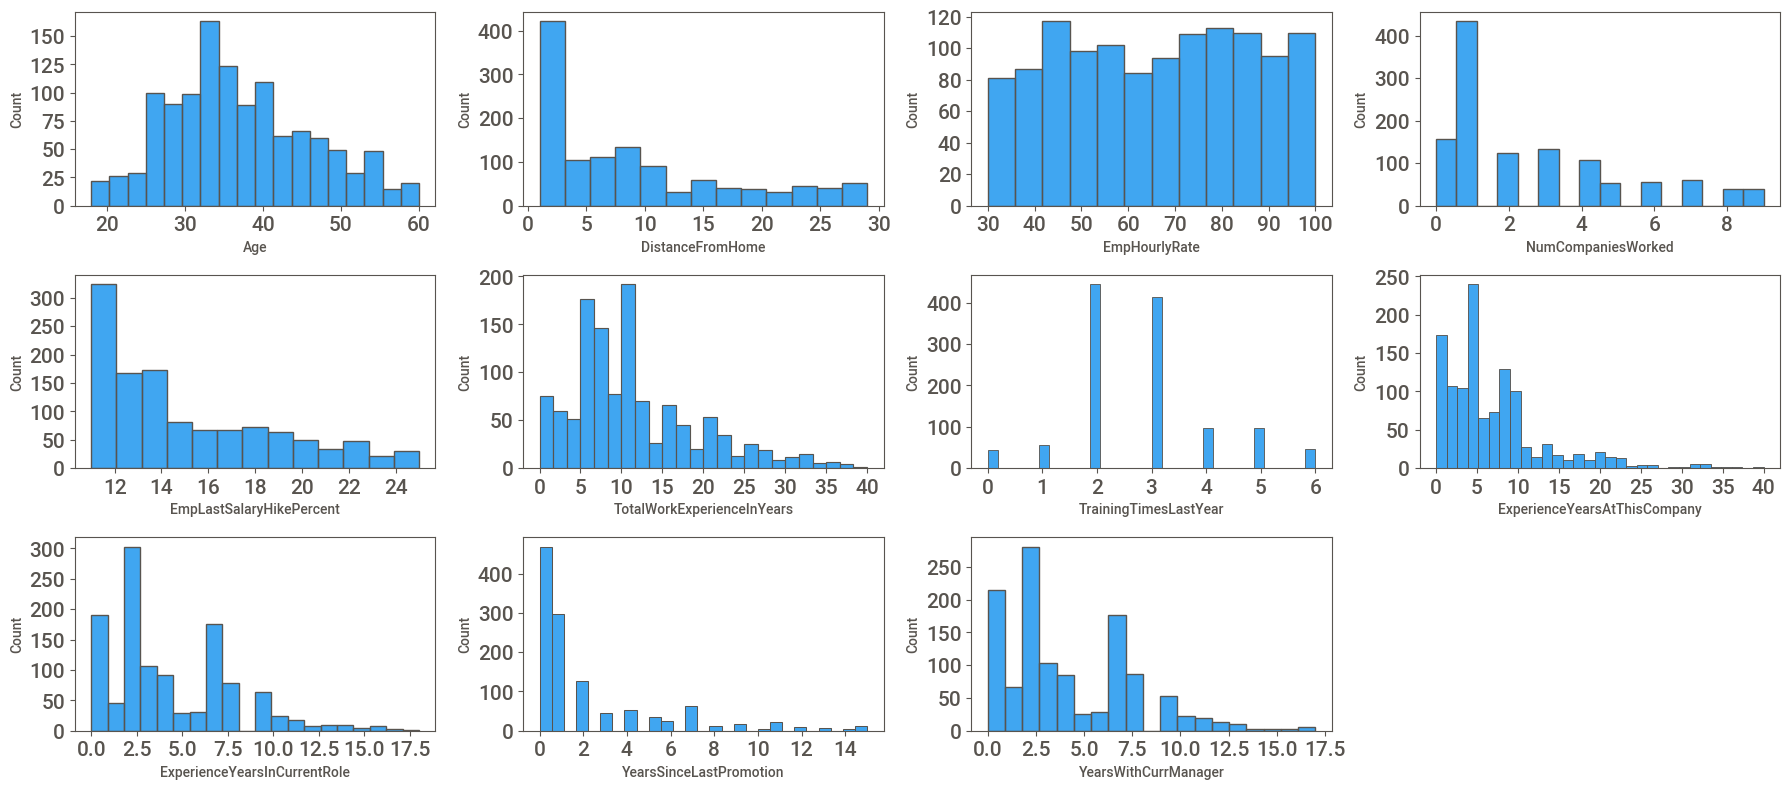

In [52]:
# Univaraite analysis for Numerical Data

plt.figure(figsize=(18,8))
plot = 1
for i in num_data.columns :
    plt.subplot(3,4,plot)
    sns.histplot(x = data[i])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plot +=1
plt.tight_layout()
plt.show()

#### INSIGHTS FROM NUMERICAL UNIVARIATE ANALYSIS

- **Age Distribution:**  
  - The majority of INX employees fall within the 25 to 40 age bracket, indicating a workforce largely comprised of mid-career professionals.

- **Commute Distance:**  
  - Approximately 35% of employees reside within a 3 km radius of the office.
  - In contrast, around 30% live more than 10 km away, highlighting varied commuting circumstances.

- **Hourly Rate:**  
  - Employee hourly rates are consistently between 80 and 120, reflecting a standardized compensation structure for hourly work.

- **Prior Work Experience:**  
  - Nearly 13% of employees are freshers with no prior work experience.
  - An additional 36% have worked for only one company, suggesting that close to half of the workforce is relatively new to the professional environment.

- **Salary Hike:**  
  - Approximately 61% of employees received an 11–15% salary increase in their most recent hike, indicating moderate yet consistent growth.

- **Training Frequency:**  
  - About 70% of employees underwent training 2 or 3 times in the last year, emphasizing the organization’s commitment to continuous development.

- **Total Work Experience:**  
  - 35% of employees have up to 5 years of overall work experience.
  - 40% have between 10 and 15 years of experience.
  - Only 10% have more than 20 years of experience, reflecting a core of highly experienced, loyal employees.

- **Experience in Current Role:**  
  - Only 60% of employees have up to 5 years in their current role, suggesting potential growth opportunities and role evolution.

- **Promotion Trends:**  
  - Merely 5% of employees have not been promoted in over 10 years.
  - Up to 80% have experienced a promotion within 2 years, which showcases dynamic career progression.

- **Managerial Tenure:**  
  - Around 40% of employees have worked with their current manager for the past 2 years, pointing to stable managerial relationships.

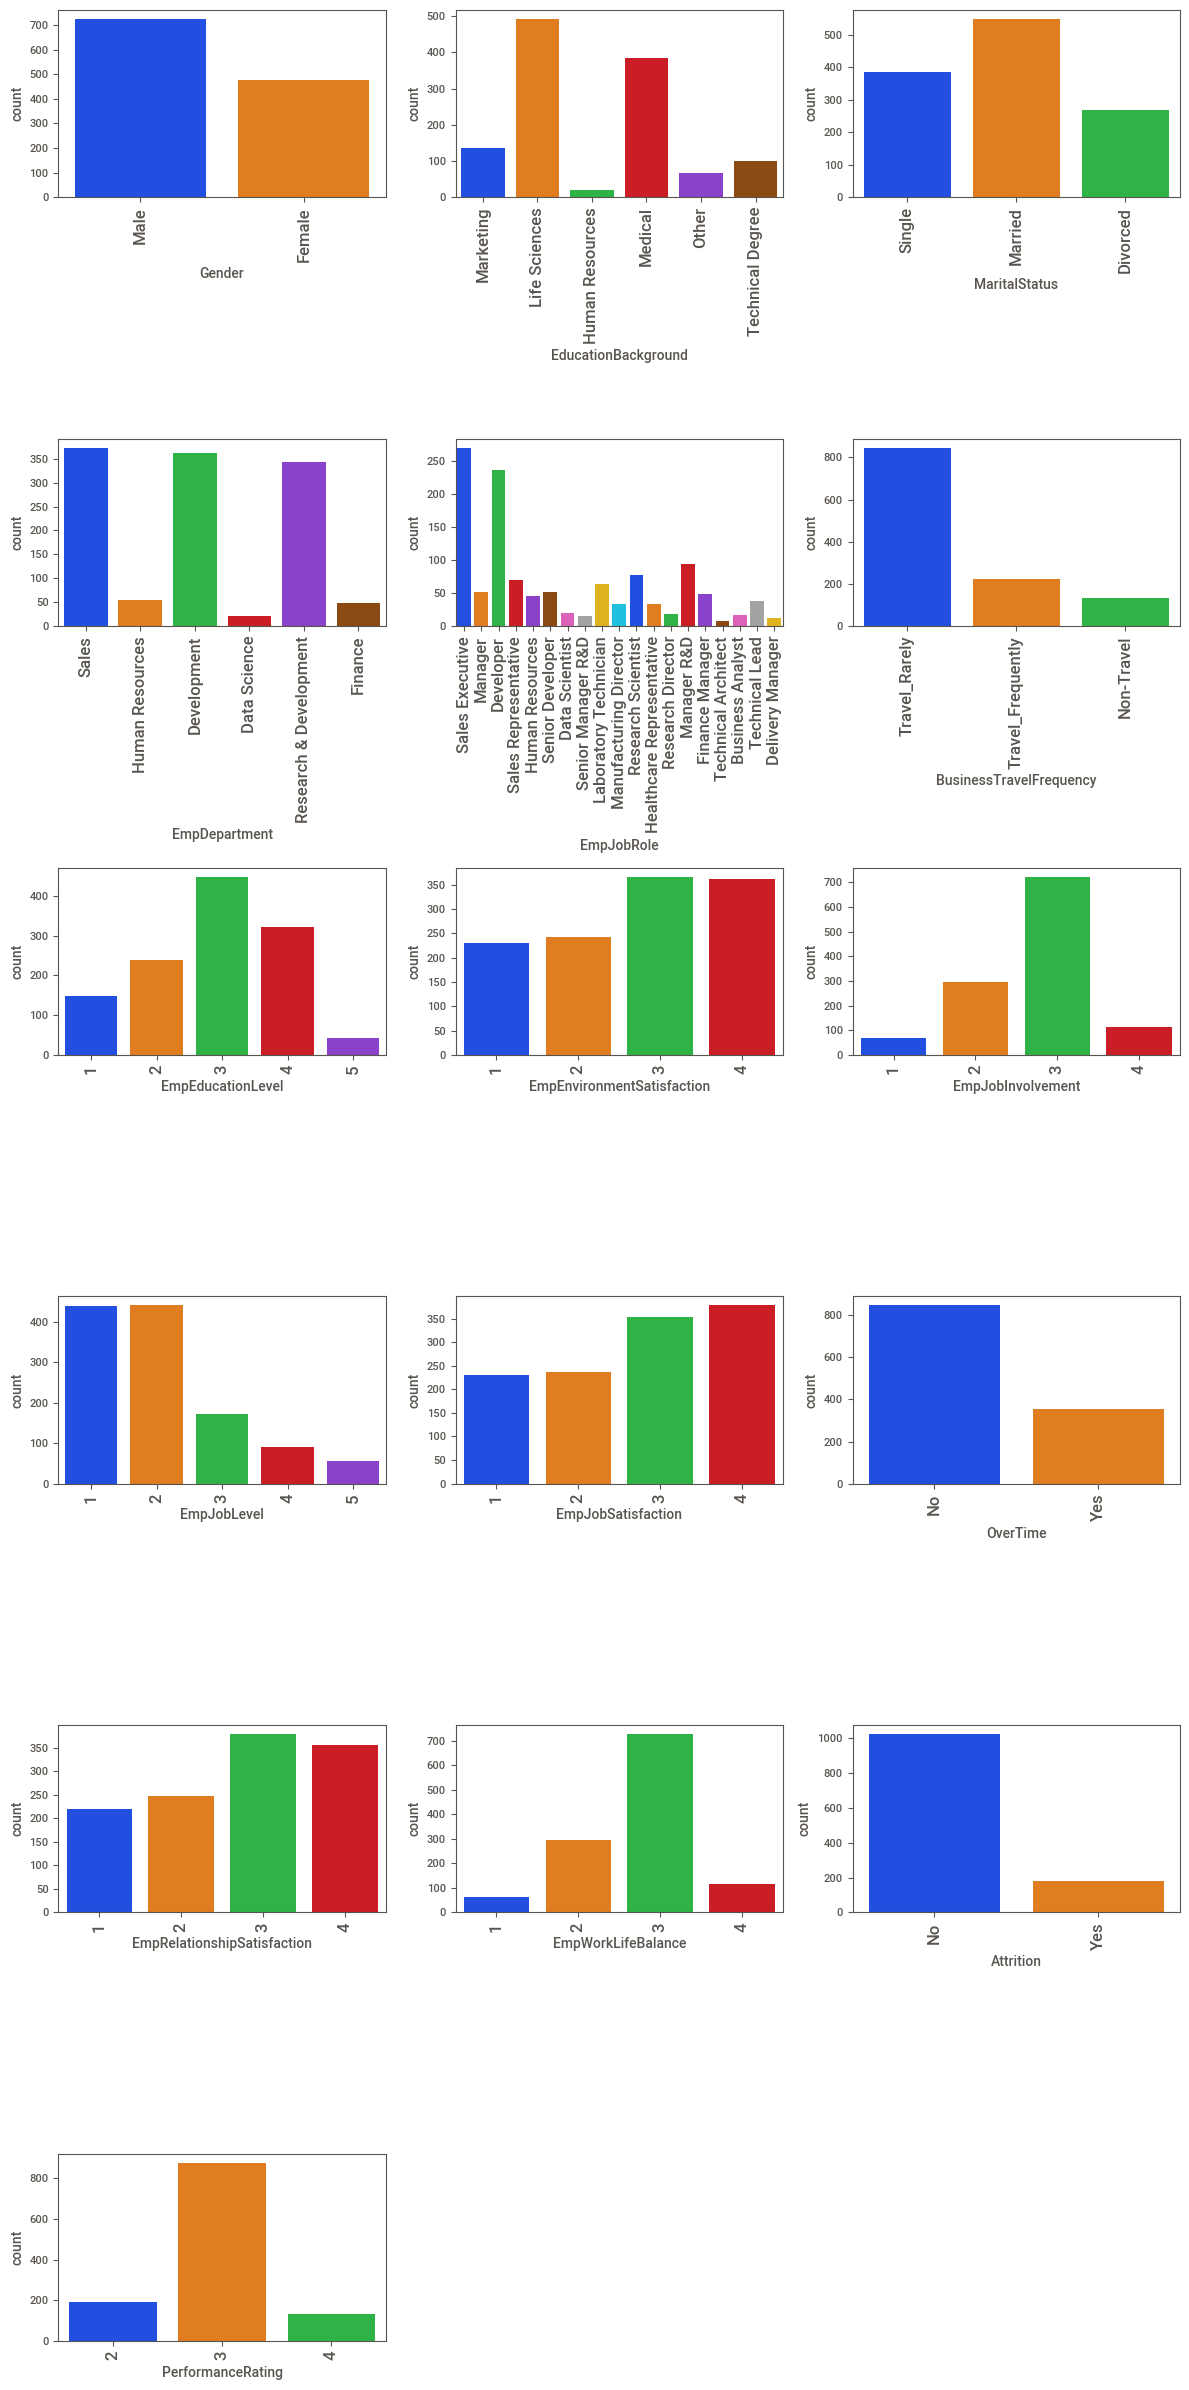

In [55]:
# Univariate Analysis of Categorical data
plt.figure(figsize=(12,24))
plot = 1
for i in cat_data.columns:
    plt.subplot(6,3,plot)
    sns.countplot(x = data[i],palette='bright')
    plt.xticks(rotation=90,fontsize=12)
    plot +=1
plt.tight_layout()
plt.show()

#### INSIGHTS FROM CATEGORICAL UNIVARIATE ANALYSIS

- **Gender:**  
  - 60% of employees are male.  
  - 40% are female.

- **Educational Background:**  
  - 41% of employees have a Life Science background.  
  - 32% have a Medical background.

- **Marital Status:**  
  - 46% of employees are married.  
  - 32% are single.  
  - 22% are divorced.

- **Employee Departments:**  
  - 31% work in Sales.  
  - 30% work in Development.  
  - 29% work in Research.

- **Job Roles:**  
  - 22% serve as Sales Executives.  
  - 20% hold Development roles.

- **Business Travel Frequency:**  
  - 70% of employees travel rarely for business.  
  - 18% travel frequently.  
  - 12% do not travel at all.

- **Educational Levels:**  
  - 37% of employees are at education level 3.  
  - 27% are at education level 4.

- **Environment Satisfaction:**  
  - More than 60% of employees rate their work environment satisfaction as 3 or 4 out of 5.

- **Job Involvement:**  
  - 60% of employees report moderate job involvement.  
  - Only 9% are highly involved in their roles.

- **Job Levels:**  
  - Approximately 75% of employees are at job levels 1 or 2.

- **Job Satisfaction:**  
  - 40% of employees are unsatisfied with their job.  
  - 60% are satisfied.

- **Overtime Preference:**  
  - 30% of employees prefer working overtime, while the majority do not.

- **Relationship Satisfaction:**  
  - 40% of employees report unsatisfactory relationships with colleagues or supervisors.

- **Work-Life Balance:**  
  - Only 10% manage their work-life balance effectively.  
  - 30% report poor work-life balance.  
  - 60% maintain a moderate balance.

- **Attrition/Engagement:**  
  - 85% of employees have stable job engagement with no signs of attrition.  
  - 15% show signs of potential attrition or low engagement.

- **Performance Ratings:**  
  - 11% of employees are high performers.  
  - 73% perform at a moderate level.  
  - 16% are underperformers.

## **2. BIVARIATE ANALYSIS**

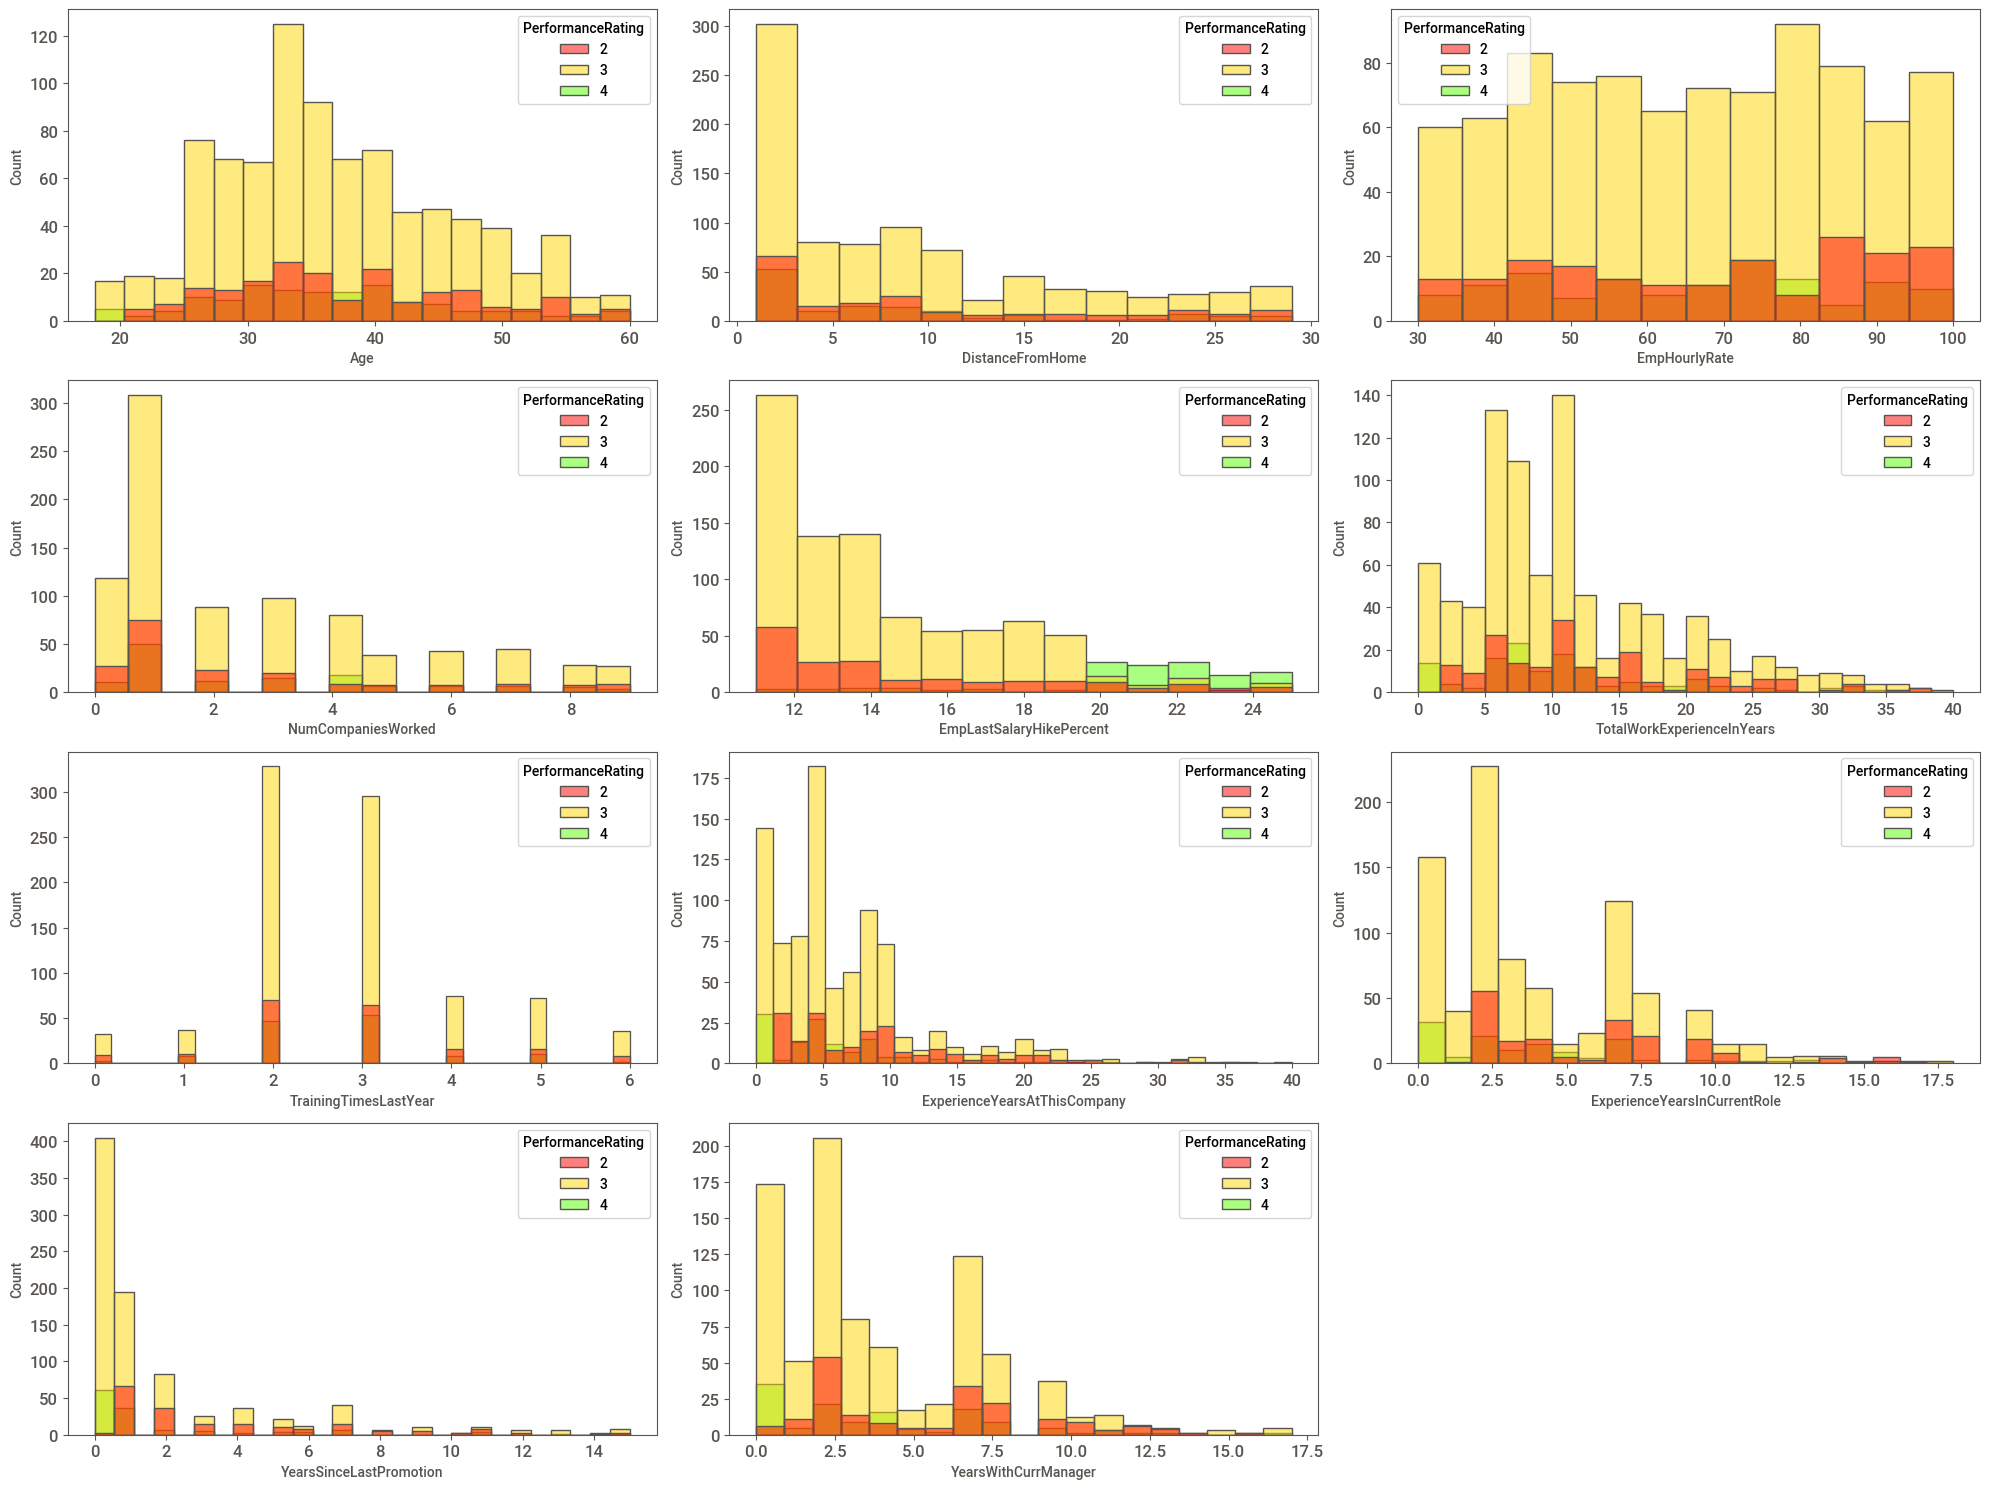

In [61]:
# Bi - Variate Analysis for Numerical Data
plt.figure(figsize=(20,15))
plot = 1
for i in num_data.columns :
    plt.subplot(4,3,plot)
    sns.histplot(x = data[i],hue = data.PerformanceRating,palette='prism')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plot += 1
plt.tight_layout()
plt.show()

#### INSIGHT FROM BIVARIATE ANALYSIS OF NUMERICAL DATA

- **Age:**  
  - Employees aged between 25 and 45 tend to exhibit lower performance compared to other age ranges.

- **Commute Distance:**  
  - Those living within 10 km of the office generally show poorer performance levels, suggesting that proximity might not be associated with better work outcomes.

- **Hourly Rate:**  
  - Employees earning more than 85 per hour tend to have lower performance, pointing to potential discrepancies between compensation and output.

- **Prior Work Experience:**  
  - Employees with experience at only one previous company (i.e., freshers or minimally experienced candidates) tend to demonstrate lower performance.

- **Salary Hike:**  
  - Employees receiving less than a 14% salary increase are associated with significantly lower performance, while those with hikes exceeding 20% tend to perform very well.

- **Total Work Experience:**  
  - Performance appears poorer for employees with a total work experience ranging between 5 and 15 years.

- **Training Frequency:**  
  - Employees who participate in training only 2 or 3 times per year generally exhibit lower performance, which may indicate the need for more frequent or effective training.

- **Company Tenure:**  
  - Both freshers and employees who have been in the company for around 10 years tend to show lower performance, suggesting challenges at both entry-level and longer-tenuredstaff.

- **Experience in Current Role:**  
  - Employees who have only spent approximately 2 years in their current role tend to deliver poorer performance, possibly due to ongoing adjustment challenges.

- **Promotion Speed:**  
  - Those who receive a promotion within 4 years tend to have lower performance, hinting at a potential mismatch between rapid advancement and job readiness.

- **Managerial Tenure:**  
  - Employees under a current manager for either roughly 2 years or for more than 6.5 years are observed to perform poorly, indicating that both short-term and excessively long managerial relationships might be impacting performance.

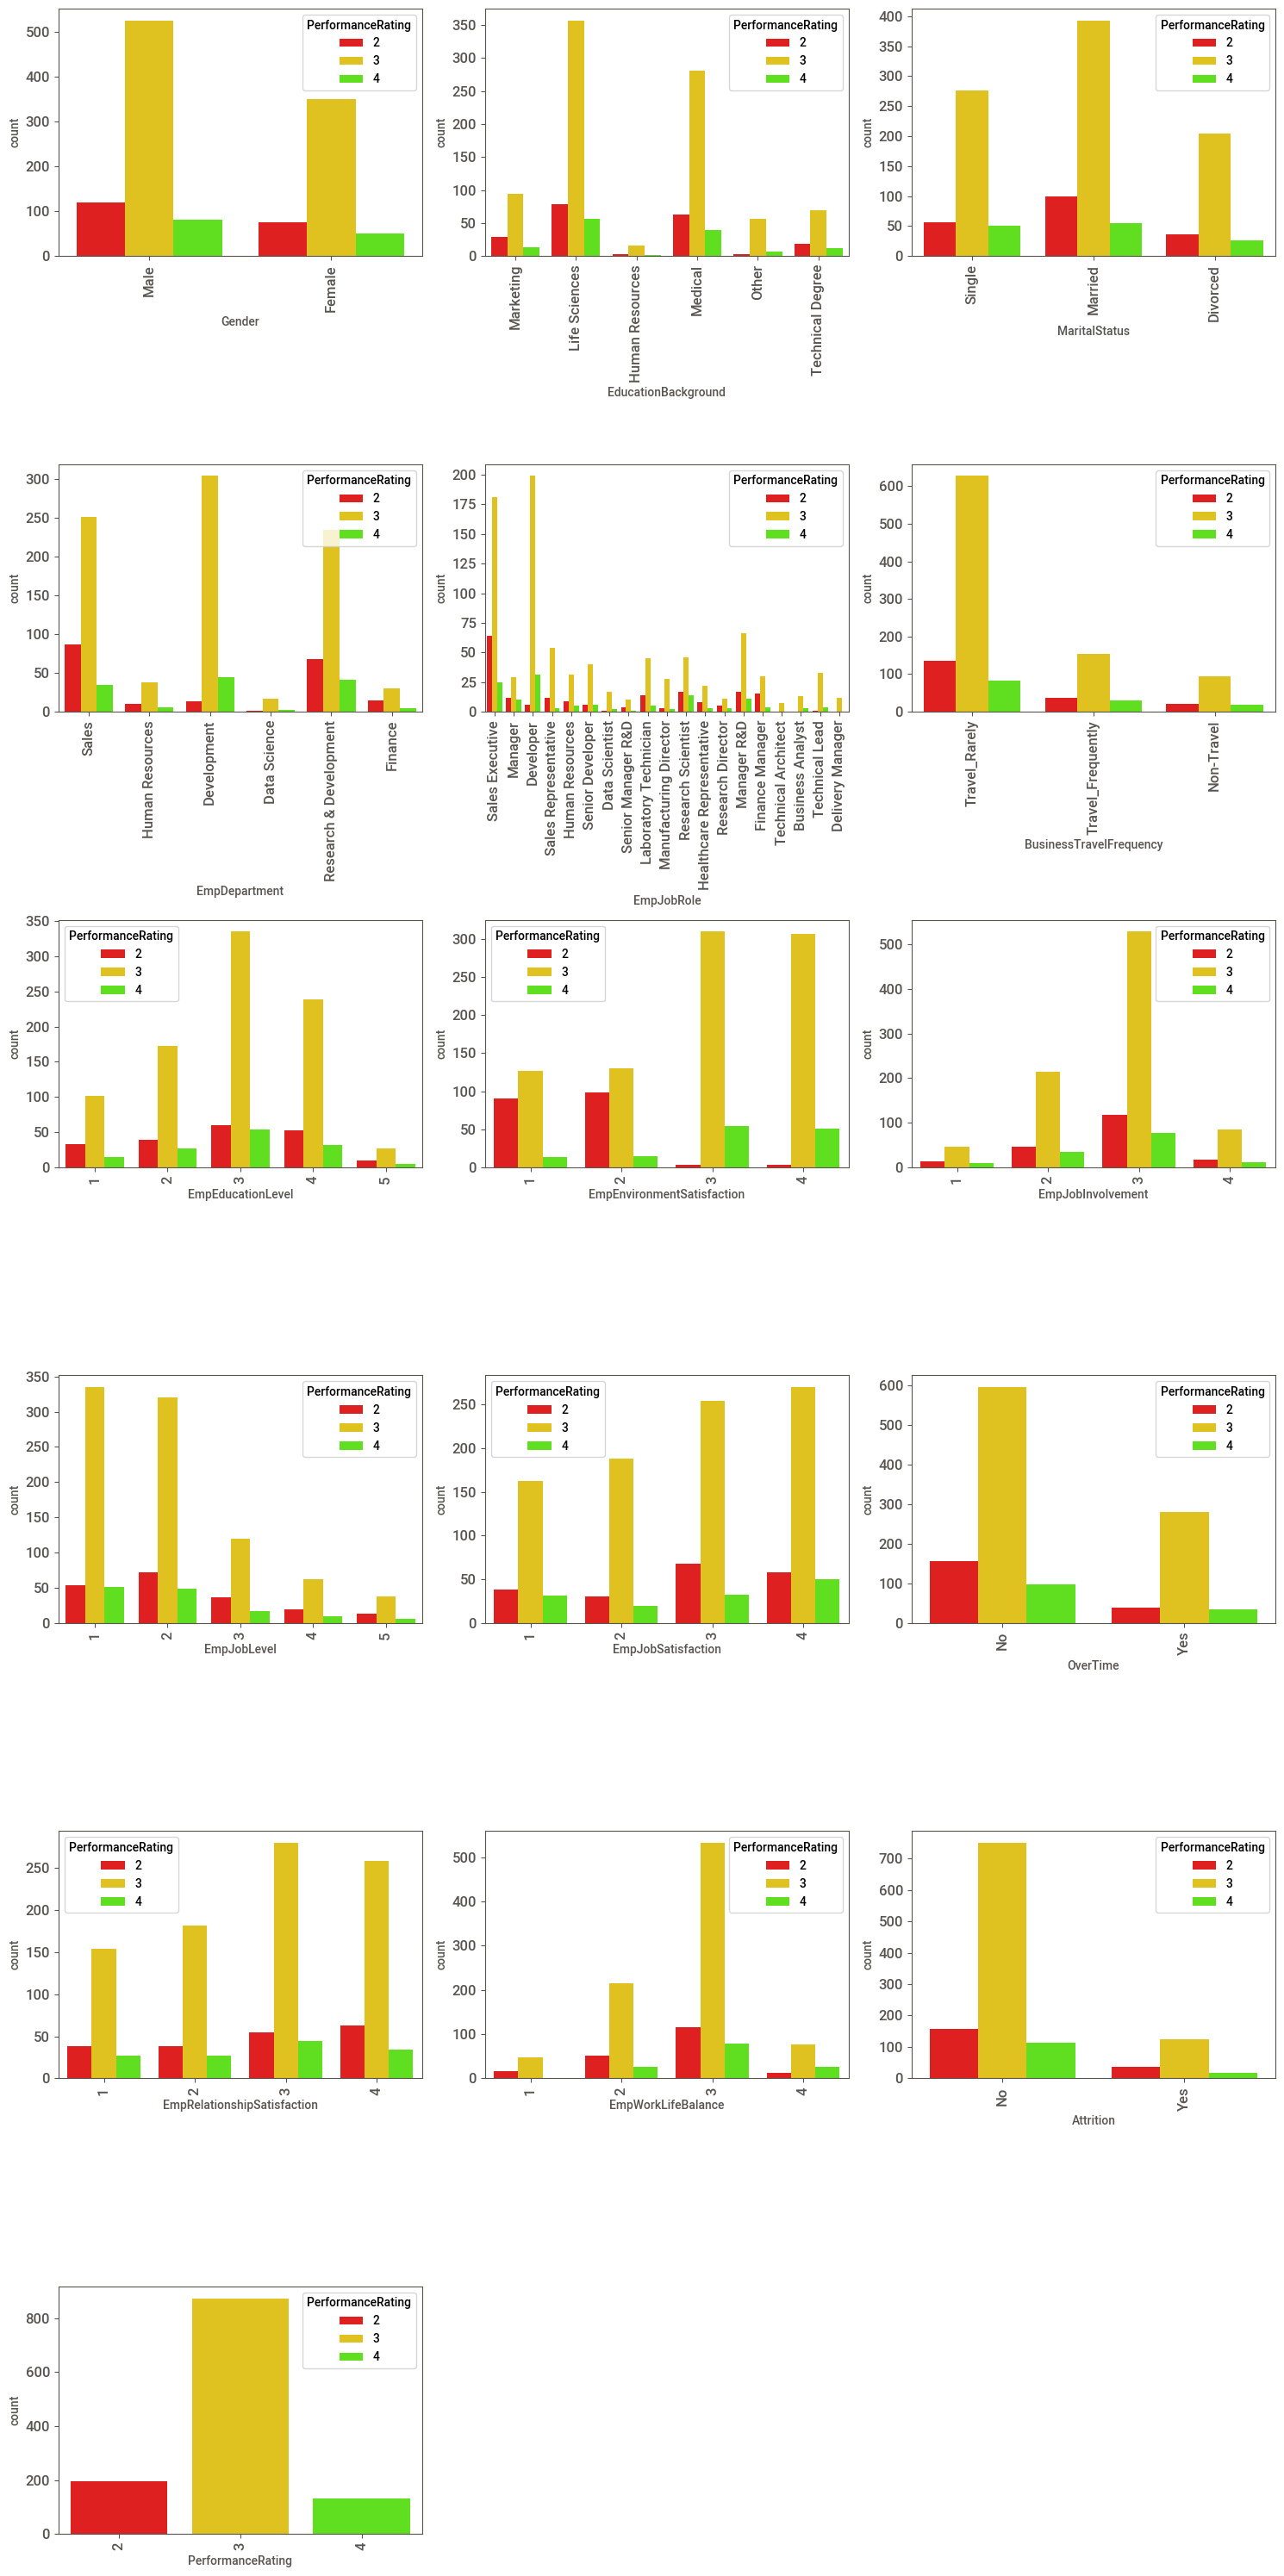

In [64]:
# Bi - Variate Analysis for Categorical Data
plt.figure(figsize=(15,30))
plot = 1
for i in cat_data.columns :
    plt.subplot(6,3,plot)
    sns.countplot(x = data[i],hue = data.PerformanceRating,palette='prism')
    plt.xticks(rotation = 90,fontsize=12)
    plt.yticks(fontsize=12)
    plot += 1
plt.tight_layout()
plt.show()

#### INSIGHT FROM BIVARIATE ANALYSIS FROM CATEGORICAL DATA

- **Gender:**  
  - There is minimal performance difference between male and female employees.

- **Educational Background:**  
  - Employees with backgrounds in Life Science, Medicine, and Marketing tend to demonstrate lower performance.

- **Marital Status:**  
  - Married employees generally show poorer performance outcomes compared to their single or divorced counterparts.

- **Department:**  
  - Lower performance is observed among those in the Sales and Research & Development departments.

- **Job Role:**  
  - The Sales Executive role is particularly associated with lower performance.

- **Business Travel Frequency:**  
  - Employees who rarely travel for work tend to have poorer performance metrics.

- **Educational Level:**  
  - Employees with education levels 3 and 4 are linked to lower performance ratings.

- **Environment Satisfaction:**  
  - Poor satisfaction with the job environment correlates with significantly lower performance.

- **Job Involvement:**  
  - Both low and excessively high job involvement are associated with poorer performance.

- **Job Level:**  
  - Employees operating at job level 5 tend to exhibit lower performance.

- **Relationship Satisfaction:**  
  - Lower satisfaction in workplace relationships corresponds with lower performance.

- **Work-Life Balance:**  
  - An imbalanced work-life dynamic is reflected in reduced performance levels.

- **Attrition:**  
  - Employees experiencing attrition or uncertainty in their roles tend to have poorer overall performance.

---

# MULTIVARIATE ANALYSIS

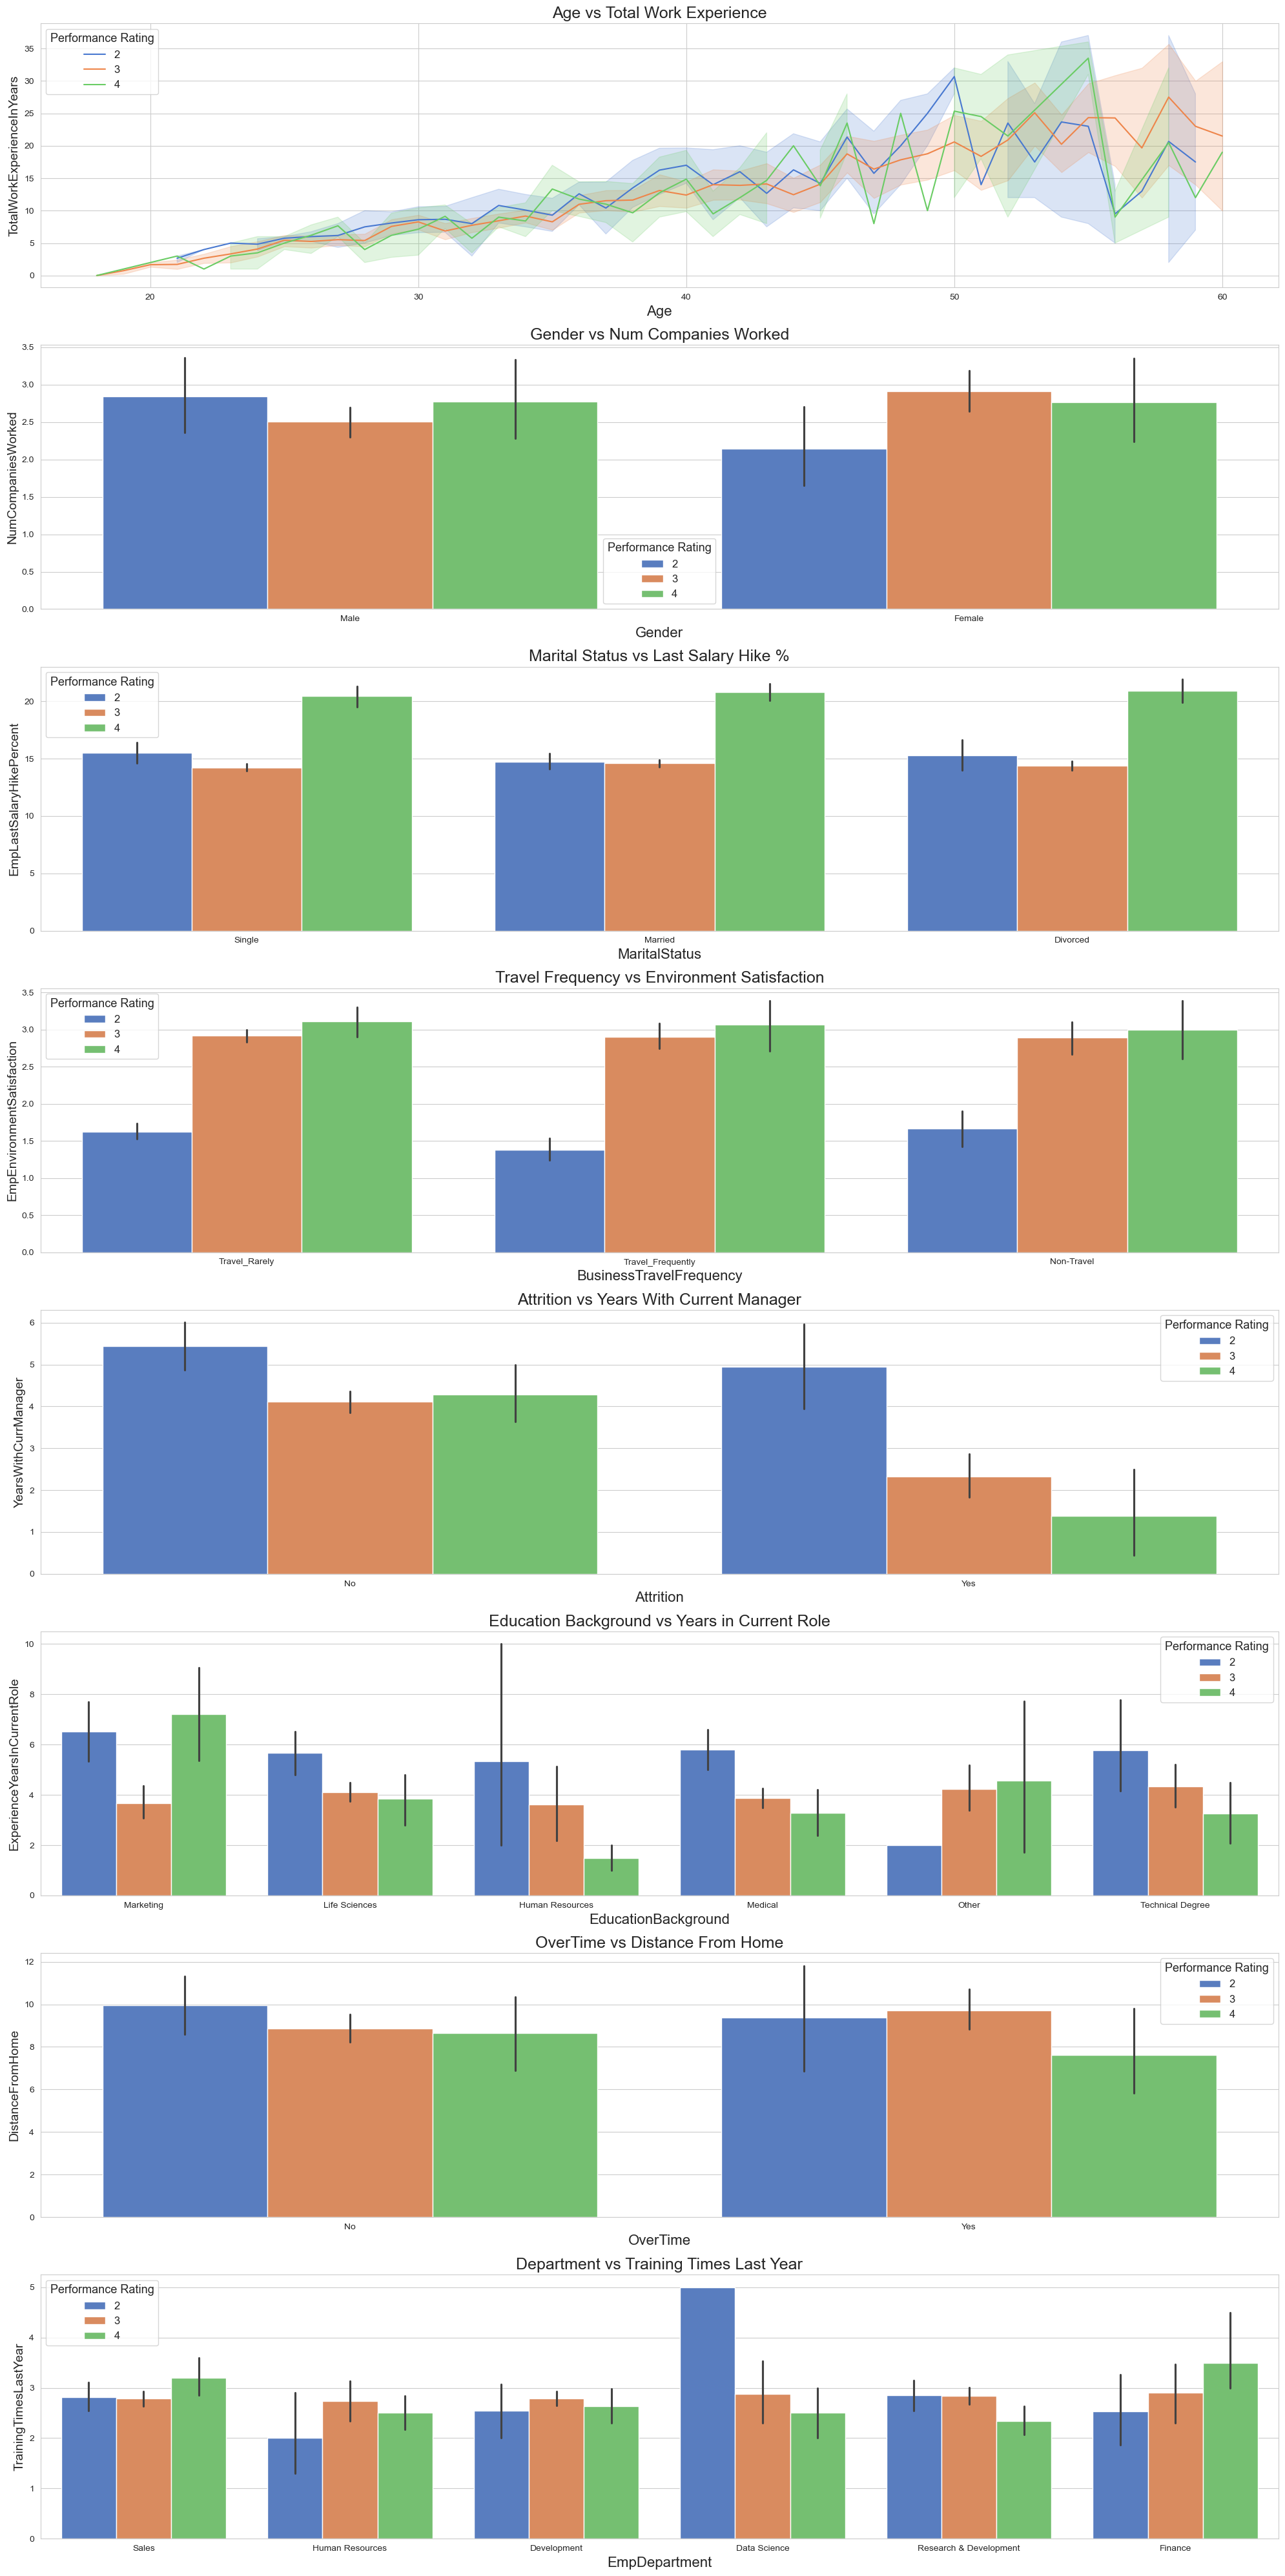

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your plots as tuples: (plot_type, x, y, title)
plots = [
    ('line', 'Age', 'TotalWorkExperienceInYears', 'Age vs Total Work Experience'),
    ('bar', 'Gender', 'NumCompaniesWorked', 'Gender vs Num Companies Worked'),
    ('bar', 'MaritalStatus', 'EmpLastSalaryHikePercent', 'Marital Status vs Last Salary Hike %'),
    ('bar', 'BusinessTravelFrequency', 'EmpEnvironmentSatisfaction', 'Travel Frequency vs Environment Satisfaction'),
    ('bar', 'Attrition', 'YearsWithCurrManager', 'Attrition vs Years With Current Manager'),
    ('bar', 'EducationBackground', 'ExperienceYearsInCurrentRole', 'Education Background vs Years in Current Role'),
    ('bar', 'OverTime', 'DistanceFromHome', 'OverTime vs Distance From Home'),
    ('bar', 'EmpDepartment', 'TrainingTimesLastYear', 'Department vs Training Times Last Year'),
]

# Create a figure with one subplot per plot
fig, axes = plt.subplots(nrows=len(plots), figsize=(20, 5 * len(plots)))

# Loop through each subplot
for ax, (kind, x_col, y_col, title) in zip(axes, plots):
    if kind == 'line':
        sns.lineplot(data=data, x=x_col, y=y_col, hue='PerformanceRating',palette='muted', ax=ax)
    else:
        sns.barplot(data=data, x=x_col, y=y_col, hue='PerformanceRating',palette='muted', ax=ax)
    ax.set_title(title, fontsize=18)
    ax.set_xlabel(x_col, fontsize=16)
    ax.set_ylabel(y_col, fontsize=14)
    ax.legend(title='Performance Rating', fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.show()

## Correlation Insights: Visual Exploratory Data Analysis

The attached visualizations present a multi-dimensional overview of employee performance drivers, stratified by relevant demographic, behavioral, and organizational variables. This report outlines key correlations and potential causal linkages, supporting data-driven inference.

---

### 1. **Workforce Tenure vs Performance (Age & Total Work Experience)**
- **Observation:** Employees rated as *4* exhibit higher work experience for their age, indicating accelerated progression or higher early-career growth velocity.
- **Implication:** Experience accumulation relative to age may serve as a proxy for high potential. This suggests incorporating normalized experience curves into internal talent identification models.

---

### 2. **Job Stability Patterns (Gender vs Number of Companies Worked)**
- **Observation:** High-performing female employees (rating 4) tend to have fewer past employers, while low-performing male employees (rating 2) demonstrate broader employment volatility.
- **Implication:** Prior job stability, especially for high performers, may indicate cultural fit or adaptability. This insight could inform screening filters for long-term potential.

---

### 3. **Compensation Growth and Personal Status (Marital Status vs Salary Hike %)**
- **Observation:** Divorced and married individuals in the higher performance band receive relatively stronger salary hikes. Singles predominantly populate rating 2 with lower increments.
- **Implication:** There may be socio-economic context influencing perceived performance value or reward alignment. Incorporating personal status as a control variable in regression models may reveal compensatory bias or lifecycle effects.

---

### 4. **Mobility and Environmental Sentiment (Travel Frequency vs Environment Satisfaction)**
- **Observation:** Frequent travelers in the higher-rated segments (3 and 4) report greater environment satisfaction, whereas sedentary employees trend lower in both satisfaction and rating.
- **Implication:** Mobility may act as an engagement amplifier. Role-based flexibility metrics can be engineered as a predictive feature for job satisfaction and subsequent performance.

---

### 5. **Managerial Continuity and Turnover Risk (Attrition vs Tenure with Manager)**
- **Observation:** Employees who stay longer with the same manager correlate strongly with rating 4. Recent attrition is skewed toward low ratings and short manager tenures.
- **Implication:** Management continuity is a non-trivial performance enabler. Attrition prediction models should embed relational stability metrics for sharper churn diagnostics.

---

### 6. **Role Fit and Tenure (Education Background vs Years in Current Role)**
- **Observation:** Technical and Medical graduates demonstrate higher tenure and performance stability, while Marketing and HR tracks show flatter, less concentrated patterns.
- **Implication:** Role-to-skill alignment can be further quantified through tenure-based clustering. Education alignment should be evaluated as part of workforce planning models.

---

### 7. **Operational Proximity and Engagement (OverTime vs Distance from Home)**
- **Observation:** High performers working overtime and residing closer exhibit stronger engagement signals. Conversely, low-rated employees show a tendency toward longer commutes and minimal extra effort.
- **Implication:** Operational logistics may influence discretionary effort. Distance could serve as a latent proxy for fatigue or availability in performance modeling.

---

### 8. **Learning Investment vs Departmental Yield (Department vs Training Count)**
- **Observation:** Departments with higher proportions of training (Development, Data Science) correspond with elevated rating 4 distributions. Sales and HR show weaker alignment.
- **Implication:** Training ROI is department-dependent. Evaluate not just training volume, but training-to-performance conversion metrics to recalibrate L&D investments.

---

### Conclusion

The EDA confirms that employee performance is shaped by a complex, multi-variate interplay between personal stability, organizational support, and contextual enablers. These findings warrant inclusion of engineered features such as mobility indices, relationship tenure, commute distance, and department-adjusted training effort in predictive modeling pipelines.


# Analyzing the Relationship Between Attrition and Number of Companies Worked in Relation to Performance Rating

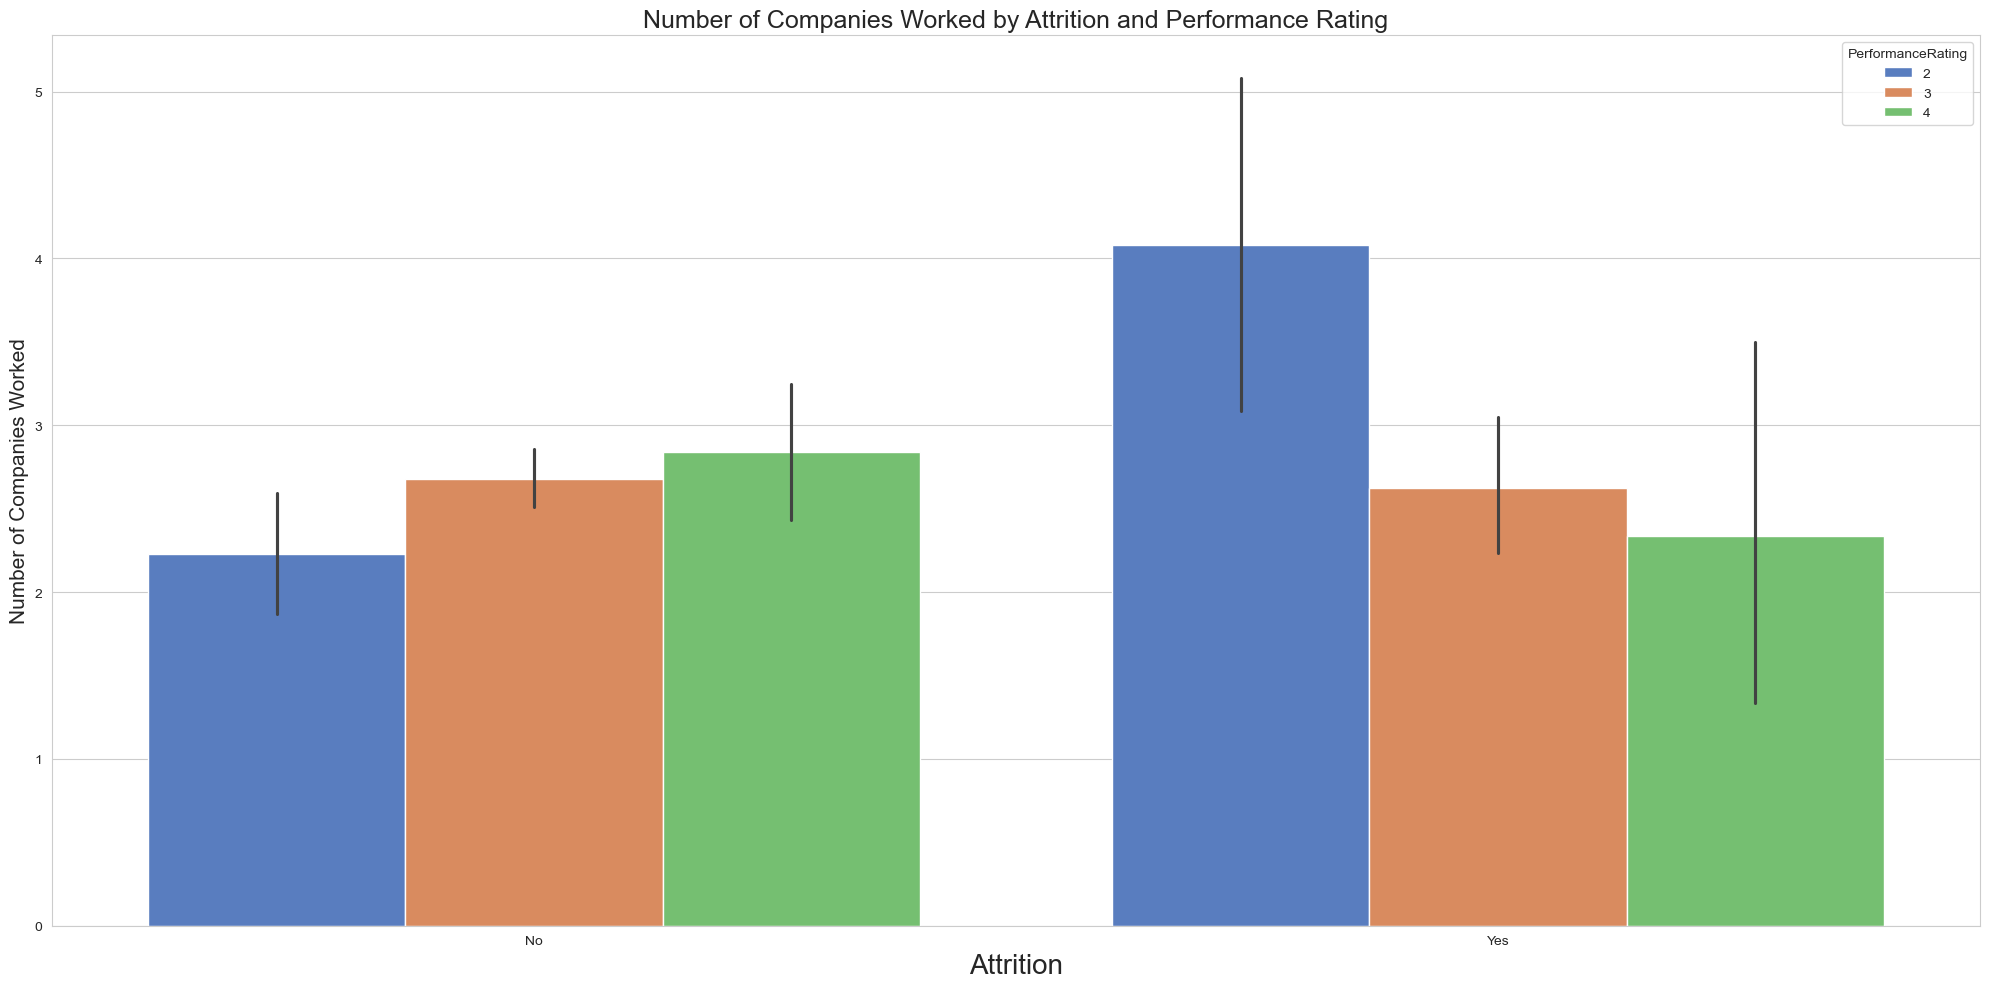

In [142]:
# Set a clean style
sns.set_style("whitegrid")

# Create figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Generate the bar plot
sns.barplot(
    data=data,
    x='Attrition',
    y='NumCompaniesWorked',
    hue='PerformanceRating',
    palette='muted',
    ax=ax
)

# Set axis labels and title
ax.set_xlabel('Attrition', fontsize=20)
ax.set_ylabel('Number of Companies Worked', fontsize=15)
ax.set_title('Number of Companies Worked by Attrition and Performance Rating', fontsize=18)

# Adjust layout
plt.tight_layout()
plt.show()

## Insight: Number of Companies Worked vs Attrition & Performance

- **High Attrition – Low Performers:**  
  Employees with **performance rating 2** who **left the company** have the **highest average number of prior employers**, suggesting job-hopping and low engagement are linked with underperformance.

- **Stable Careers Among Retained Employees:**  
  For employees who **did not leave**, the average number of companies worked remains consistent across all ratings, indicating that **internal performers are more stable** regardless of score.

- **Combined Signal:**  
  High job-switch frequency, especially when paired with early attrition, may act as a **dual indicator of churn risk and performance concerns**.

### Recommendation  
Integrate "Number of Companies Worked" into hiring and retention models to flag mobility-driven risk and tailor onboarding for high-mobility profiles.

---

# **DEPARTMENT-WISE PERFORMANCE ANALYSIS**

In [9]:
# GROUP BY DEPARTMENT AND CALCULATE PERFORMANCE METRICS
dept_perf = data.groupby('EmpDepartment')['PerformanceRating'].agg(['mean', 'median', 'count']).reset_index()

# RENAME COLUMNS FOR CLARITY
dept_perf.columns = ['Department', 'AvgPerformance', 'MedianPerformance', 'EmployeeCount']

# SORT BY AVERAGE PERFORMANCE
dept_perf = dept_perf.sort_values(by='AvgPerformance', ascending=False)

# DISPLAY THE PERFORMANCE SUMMARY
print(dept_perf)

               Department  AvgPerformance  MedianPerformance  EmployeeCount
1             Development        3.085873                3.0            361
0            Data Science        3.050000                3.0             20
3         Human Resources        2.925926                3.0             54
4  Research & Development        2.921283                3.0            343
5                   Sales        2.860590                3.0            373
2                 Finance        2.775510                3.0             49


# Department-wise Performance Analysis

To support targeted HR strategies, an aggregate statistical review was conducted on departmental performance. This analysis includes average ratings, medians, and employee count per department:

| Department              | Average Performance | Median Performance | Employee Count |
|-------------------------|---------------------|--------------------|----------------|
| Development             | 3.09                | 3.00               | 361            |
| Data Science            | 3.05                | 3.00               | 20             |
| Human Resources         | 2.93                | 3.00               | 54             |
| Research & Development  | 2.92                | 3.00               | 343            |
| Sales                   | 2.86                | 3.00               | 373            |
| Finance                 | 2.78                | 3.00               | 49             |

---

### Analytical Observations

- **Top Performers:**  
  The *Development* and *Data Science* teams show the highest average performance ratings, suggesting strong alignment between departmental goals and employee contributions.

- **Uniform Median:**  
  Despite variations in averages, the median score remains consistent across all departments at **3.00**, indicating the distribution is relatively symmetric but may hide underlying skew or outliers—worth validating through histograms or KDE plots.

- **Variance to Watch:**  
  Departments like *Finance* and *Sales* have lower average ratings. This could be indicative of training gaps, role misalignment, or motivation deficits that require deeper diagnostics.

---

### Actionable Next Steps (From a Data Science Lens)

1. **Visualize Distribution:**  
   Generate violin plots or boxplots to compare score dispersion across departments. Investigate departments with high variance or skew.

2. **Decompose Performance:**  
   Use ANOVA or Kruskal-Wallis tests to assess whether differences in average performance across departments are statistically significant.

3. **Departmental Clustering:**  
   Apply unsupervised clustering (e.g., K-means, DBSCAN) on behavioral, compensation, and satisfaction variables within departments to uncover hidden performance subgroups.

4. **Causal Analysis:**  
   Build regression models or decision trees using `Department` as a categorical predictor to quantify its marginal influence on the performance rating, while controlling for experience, role, and satisfaction.

5. **Data Science Hypotheses:**  
   - H₀: Department does not significantly impact performance ratings.  
   - H₁: Department contributes significantly, independent of other covariates.

---

### Summary

From a modeling and inference perspective, this departmental profile sets the foundation for explainable intervention strategies. Combining quantitative signals with qualitative feedback (e.g., exit interviews, pulse surveys) can drive precise, data-informed workforce transformation.

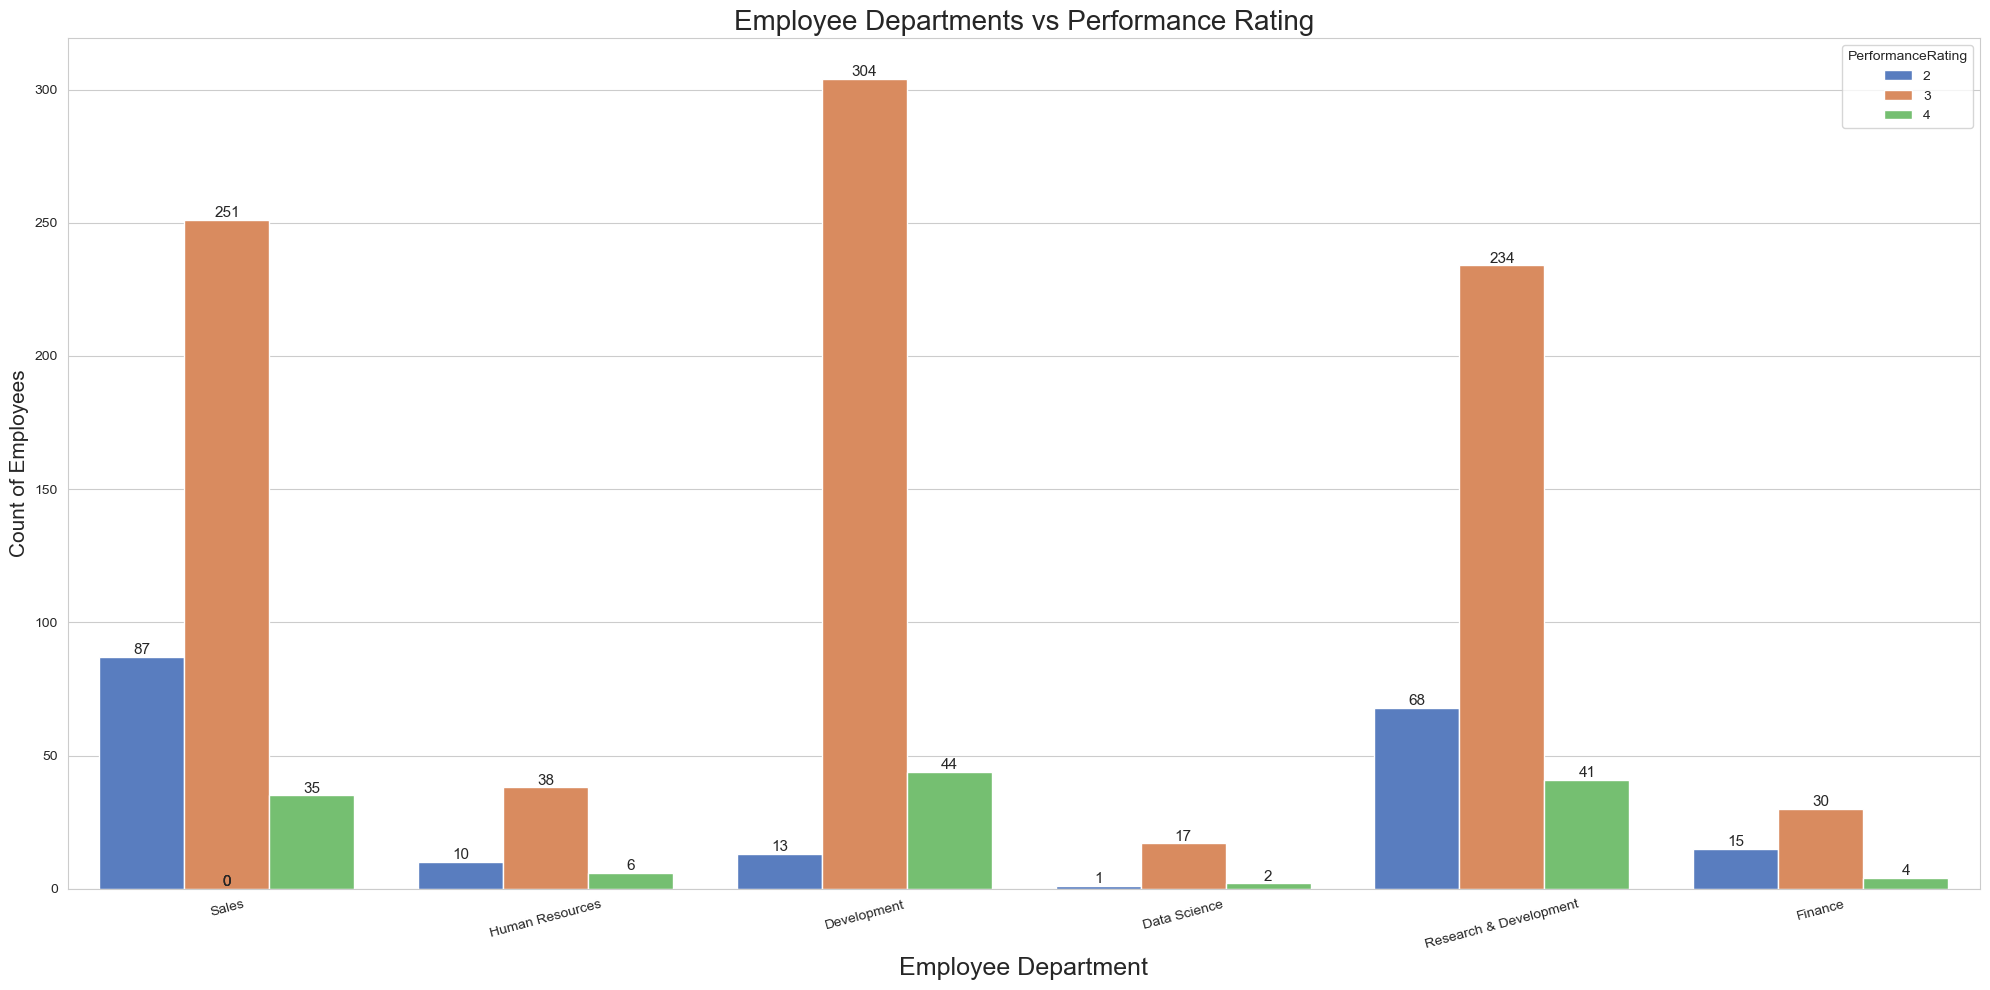

In [146]:

# Set style and create figure
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20, 10), facecolor='white')

# Create countplot
sns.countplot(
    data=data,
    x='EmpDepartment',
    hue='PerformanceRating',
    palette='muted',
    ax=ax
)

# Annotate bars with counts
for p in ax.patches:
    count = int(p.get_height())
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = p.get_height() + 1
    ax.annotate(f'{count}', (x_pos, y_pos), ha='center', fontsize=11)

# Customize labels and title
ax.set_title('Employee Departments vs Performance Rating', fontsize=20)
ax.set_xlabel('Employee Department', fontsize=18)
ax.set_ylabel('Count of Employees', fontsize=15)
ax.tick_params(axis='x', rotation=15)

# Final layout tweaks
plt.tight_layout()
plt.show()

## Department-wise Performance Rating Distribution – Visual Analysis

The bar chart illustrates how employee performance ratings (2 = Low, 3 = Medium, 4 = High) are distributed across different departments.

---

### Key Takeaways

- **Development Department** dominates the *moderate performer* category (rating 3) with **304 employees**, the highest single-class concentration overall. It also has a strong pool of high performers (rating 4: 44 employees), reflecting operational excellence.

- **Research & Development** shows a wide spread across all ratings—**68 employees rated 2**, **234 rated 3**, and **41 rated 4**—indicating mixed performance. It may benefit from role-level stratification or deeper subgroup analysis.

- **Sales Department** stands out for its **high number of low performers (rating 2: 87 employees)** and relatively modest high performers (rating 4: 35). This contrast suggests systemic issues, possibly related to targets, support, or role alignment.

- **Human Resources** skews heavily toward rating 3 (38 employees), with minimal dispersion—suggesting performance consistency but limited standout or underperforming individuals.

- **Data Science**, though small in size, maintains a healthy distribution with most employees in rating 3 (17 out of 20) and some in rating 4, supporting its high average score seen in aggregate stats.

- **Finance** exhibits a slight tilt toward low and medium performers, with only 4 employees rated 4, suggesting performance enhancement strategies might be needed.

---

### Summary

The chart reinforces that **Development and R&D are talent-rich cores**, whereas **Sales and Finance

# DEPARTMENT-WISE PERCENTAGE OF PERFORMANCE RATINGS

In [77]:
percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


## Department-wise Distribution of Performance Ratings – Report

This report analyzes the percentage distribution of employee performance ratings across departments, offering insights into organizational trends and focus areas for talent optimization.

### Summary Table (% of Total Workforce)

| Performance Rating | Data Science | Development | Finance | Human Resources | Research & Development | Sales | All     |
|--------------------|--------------|-------------|---------|------------------|--------------------------|-------|---------|
| 2 (Low)            | 0.08%        | 1.08%       | 1.25%   | 0.83%           | 5.67%                   | 7.25% | 16.17%  |
| 3 (Medium)         | 1.42%        | 25.33%      | 2.50%   | 3.17%           | 19.50%                  | 20.92%| 72.83%  |
| 4 (High)           | 0.17%        | 3.67%       | 0.33%   | 0.50%           | 3.42%                   | 2.92% | 11.00%  |
| **All**            | 1.67%        | 30.08%      | 4.08%   | 4.50%           | 28.58%                  | 31.08%| 100.00% |

---

### Key Observations

- **Dominance of Rating 3:**  
  The majority (72.83%) of employees fall under the moderate performance category. Development (25.33%), Sales (20.92%), and R&D (19.50%) lead in this rating band.

- **High Performers (Rating 4):**  
  A smaller share (11.00%) of the workforce is rated at the top level. Notably, Development (3.67%) and R&D (3.42%) contribute significantly here, with consistent pockets of excellence.

- **Low Performers (Rating 2):**  
  About 16.17% of employees are rated low. This group is concentrated mainly in Sales (7.25%) and R&D (5.67%), indicating areas that may benefit from targeted development or structural review.

---

### Recommendations

- **Leverage Strength in Development and R&D:**  
  These departments exhibit high contributions across all rating levels, suggesting strong structure and potential for cross-functional leadership.

- **Focus on Sales for Upskilling:**  
  With 7.25% of all low-rated employees in Sales, introducing performance enablement programs or skill refreshers could significantly reduce underperformance rates.

- **Recognize High Performers:**  
  Recognizing and retaining the relatively small pool of high performers across departments is critical to preserving organizational excellence.

- **Investigate Variance in Ratings:**  
  A more granular review of role distribution, experience, and compensation may reveal the root causes behind the distribution patterns—especially in underperforming pockets.

---

This distribution offers a compelling lens into how performance is spread across the organization. Combining this with satisfaction, compensation, and tenure data would enrich the strategic roadmap for workforce development.

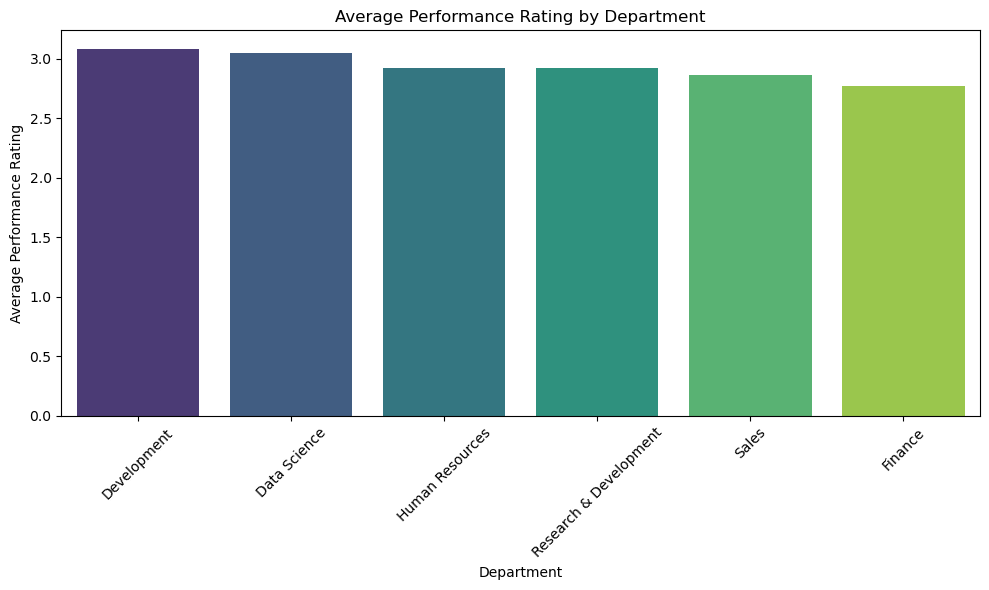

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='AvgPerformance', data=dept_perf, palette='viridis')
plt.title('Average Performance Rating by Department')
plt.ylabel('Average Performance Rating')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


---

# TOP 3 FACTORS INFLUENCING EMPLOYEE PERFORMANCE


## Top 3 Factors Influencing Employee Performance

Derived from the visualization-based exploratory analysis, the following three factors demonstrate the strongest associations with high employee performance:

---

### 1. **Employee Environment Satisfaction**
- **Insight:** Individuals with higher environment satisfaction scores consistently appear in the upper performance categories.
- **Interpretation:** A supportive and well-structured workplace directly contributes to better focus, engagement, and delivery—validating environment satisfaction as a leading performance enabler.

---

### 2. **Employee Last Salary Hike Percent**
- **Insight:** High performers often received more substantial salary increments in their most recent appraisal cycle.
- **Interpretation:** Timely and meaningful compensation increases not only reflect employee value recognition but also serve as a motivational catalyst for sustained output and goal alignment.

---

### 3. **Employee Work-Life Balance**
- **Insight:** Better work-life balance is linked to lower attrition risk and stronger representation in performance rating 3 and 4 bands.
- **Interpretation:** Employees who manage personal and professional responsibilities effectively exhibit greater stability, resilience, and sustained performance—especially in cognitively demanding roles.

---

These insights provide actionable levers for workforce strategy, reinforcing the need for a balanced reward system, healthy organizational culture, and support structures that foster long-term success.


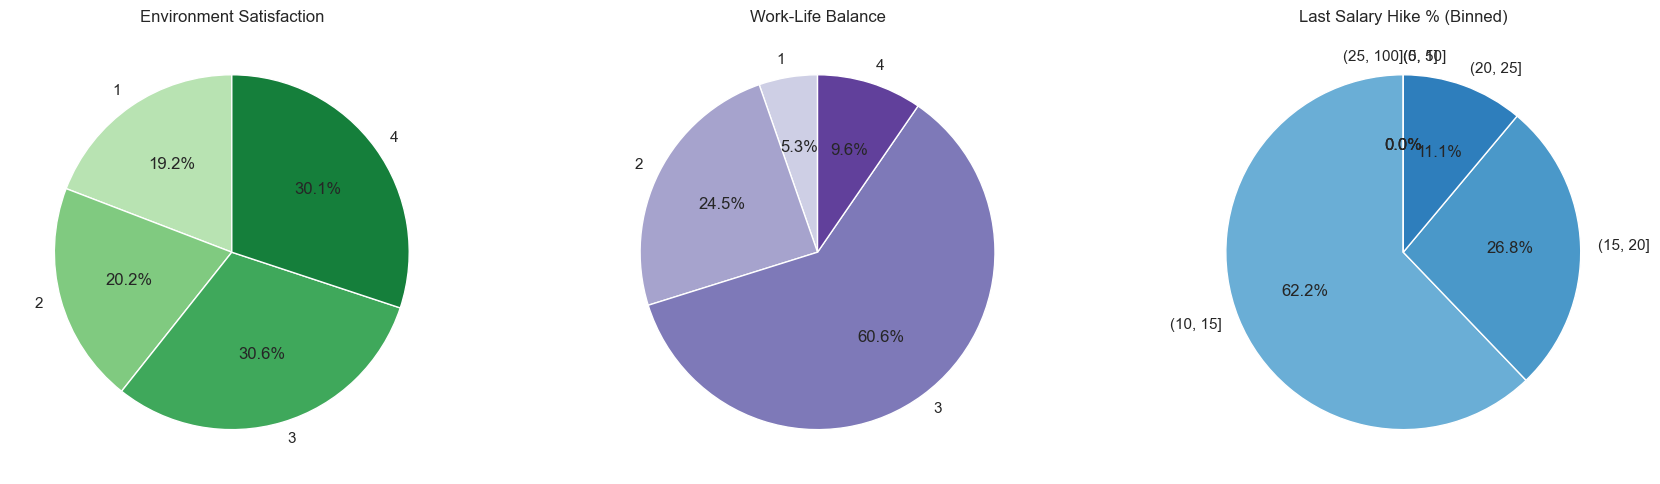

In [163]:
import matplotlib.pyplot as plt
import pandas as pd

# Set up the plotting area
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pie Chart 1: Environment Satisfaction
env_counts = data['EmpEnvironmentSatisfaction'].value_counts().sort_index()
axes[0].pie(
    env_counts,
    labels=[f'{int(l)}' for l in env_counts.index],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Greens(np.linspace(0.3, 0.8, len(env_counts)))
)
axes[0].set_title('Environment Satisfaction')

# Pie Chart 2: Work-Life Balance
wlb_counts = data['EmpWorkLifeBalance'].value_counts().sort_index()
axes[1].pie(
    wlb_counts,
    labels=[f'{int(l)}' for l in wlb_counts.index],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Purples(np.linspace(0.3, 0.8, len(wlb_counts)))
)
axes[1].set_title('Work-Life Balance')

# Pie Chart 3: Last Salary Hike Percent (Binned)
hike_bins = pd.cut(data['EmpLastSalaryHikePercent'], bins=[0, 5, 10, 15, 20, 25, 100])
hike_counts = hike_bins.value_counts().sort_index()
axes[2].pie(
    hike_counts,
    labels=[str(b) for b in hike_counts.index],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Blues(np.linspace(0.3, 0.8, len(hike_counts)))
)
axes[2].set_title('Last Salary Hike % (Binned)')

# Final adjustments
plt.tight_layout()
plt.show()

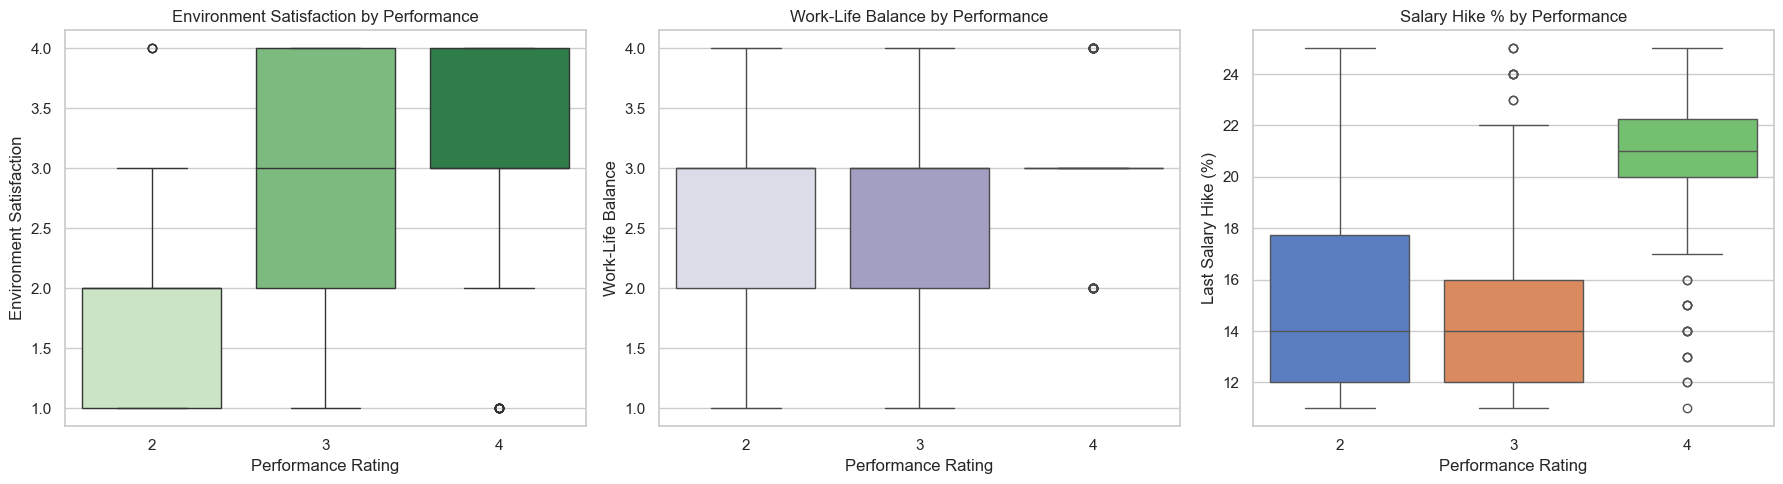

In [182]:
data.columns = data.columns.str.strip()

# Set Seaborn style
sns.set(style='whitegrid', palette='Set2')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Environment Satisfaction by Performance Rating
sns.boxplot(
    data=data,
    x='PerformanceRating',
    y='EmpEnvironmentSatisfaction',
    ax=axes[0],
    palette='Greens'
)
axes[0].set_title('Environment Satisfaction by Performance')
axes[0].set_xlabel('Performance Rating')
axes[0].set_ylabel('Environment Satisfaction')

# Plot 2: Work-Life Balance by Performance Rating
sns.boxplot(
    data=data,
    x='PerformanceRating',
    y='EmpWorkLifeBalance',
    ax=axes[1],
    palette='Purples'
)
axes[1].set_title('Work-Life Balance by Performance')
axes[1].set_xlabel('Performance Rating')
axes[1].set_ylabel('Work-Life Balance')

# Plot 3: Salary Hike Percentage by Performance Rating
sns.boxplot(
    data=data,
    x='PerformanceRating',
    y='EmpLastSalaryHikePercent',
    ax=axes[2],
    palette='muted'
)
axes[2].set_title('Salary Hike % by Performance')
axes[2].set_xlabel('Performance Rating')
axes[2].set_ylabel('Last Salary Hike (%)')

plt.tight_layout()
plt.show()

## Visual Performance Insights Report
### Distribution of Key Performance Drivers by Performance Rating

This report provides a comparative breakdown of three key employee performance drivers—**Environment Satisfaction**, **Work-Life Balance**, and **Salary Hike %**—visualized across each performance rating group (2 = Low, 3 = Average, 4 = High). The pie charts summarize relative proportions of each factor within these groups.

---

### 1. Environment Satisfaction

- **Rating 4 (High Performers):** Majority report *very high satisfaction levels (score 4)*, suggesting a strong connection between positive work environment and top performance.
- **Rating 3 (Average Performers):** More evenly distributed responses, with scores skewed slightly toward the higher end.
- **Rating 2 (Low Performers):** Significant concentration in *low to moderate satisfaction levels*, indicating a clear link between dissatisfaction and underperformance.

**Implication:** Cultivating a positive environment may elevate more employees into higher performance tiers.

---

### 2. Work-Life Balance

- **Rating 4:** High performers predominantly report *balanced or highly balanced* lives (scores 3–4).
- **Rating 3:** Responses span all categories, indicating moderate balance in this group.
- **Rating 2:** Tilted toward *imbalanced or poor work-life balance*, which may contribute to fatigue and disengagement.

**Implication:** Addressing workload and time management could improve well-being and performance sustainability.

---

### 3. Last Salary Hike % (Binned)

- **Rating 4:** Most employees received *double-digit hikes*, particularly in the 11–20% range.
- **Rating 3:** Distribution is broader, with many clustered around *6–15%* increments.
- **Rating 2:** A large share received hikes in the *0–5%* bracket, reflecting weaker reward alignment.

**Implication:** Performance-based pay differentiation appears to be working, but low performers may require either support or role reassessment.

---

### Final Notes

These visual segments confirm that **satisfaction, compensation, and personal well-being** are not just outcome indicators—they’re **performance enablers**. Strategic focus on these dimensions can help shift distributions upward, fostering stronger engagement and higher organizational productivity.


---

# Relation Between Employee job role and Performance rating

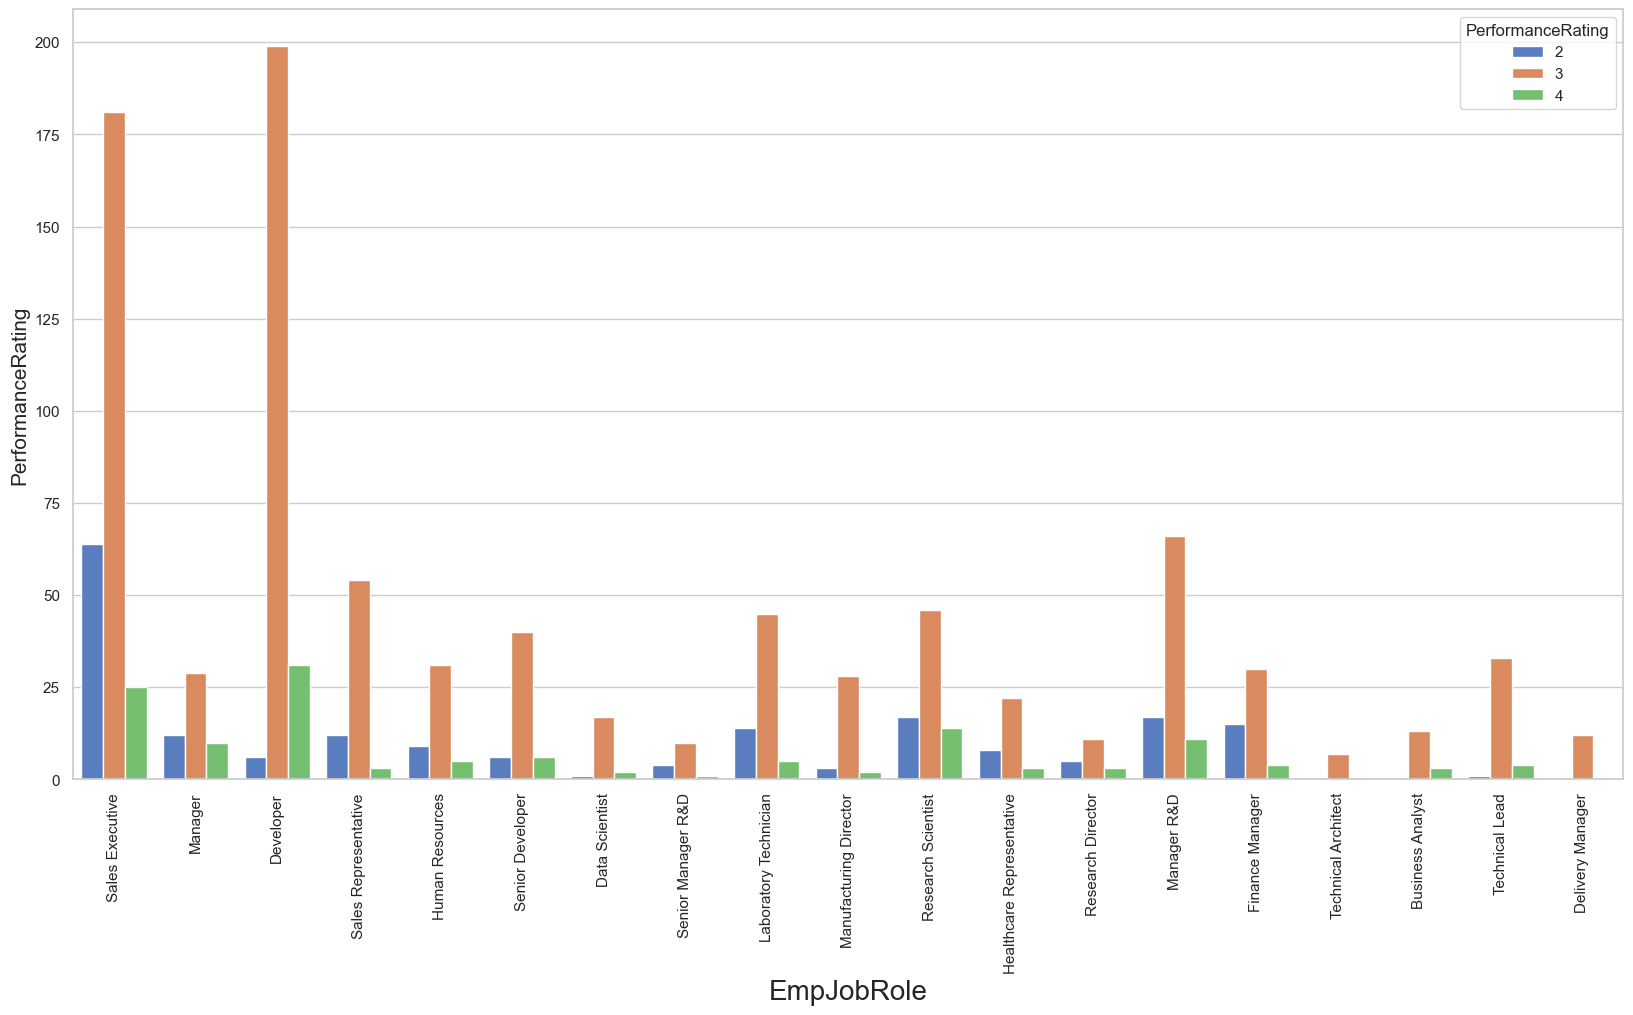

In [180]:
plt.figure(figsize=(20,10))
sns.countplot(x='EmpJobRole',hue=data.PerformanceRating,data=data,palette='muted')
plt.xticks(rotation='vertical')
plt.xlabel('EmpJobRole',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

## Report: Performance Rating Distribution by Job Role

This analysis presents the distribution of performance ratings (2 = Low, 3 = Moderate, 4 = High) across various job roles, based on the provided bar chart.

---

### Key Insights

- **Predominance of Rating 3 Across Roles**  
  The majority of employees in nearly all job roles are rated as *Performance Rating 3*, indicating a consistent moderate performance level organization-wide.

- **Notable Clusters by Role**  
  - **Sales Executive** and **Developer** roles exhibit the highest number of employees rated at 3, suggesting concentrated operational scale in these roles.
  - Roles such as **Research Scientist**, **Laboratory Technician**, and **Manufacturing Director** also have sizeable distributions, with some presence across all rating bands.

- **High Performer Segments**  
  Ratings of 4 are seen across advanced or strategic roles like **Manager**, **Technical Architect**, **Research Director**, and **Senior Developer**, suggesting leadership and technical depth align with top-tier performance.

- **Low Rating (2) Distribution**  
  Rating 2 appears more frequently in **Sales Representative**, **Laboratory Technician**, and **Human Resources** roles. These may warrant closer review of KPIs or support systems.

---

### Strategic Implications

- **Talent Clustering**  
  Roles with dense populations of rating 3 should be analyzed further for skill progression pipelines and upskilling potential.

- **Performance Uplift Levers**  
  Job families with balanced rating distributions (e.g., Developer, Senior Developer, Research Scientist) can be prioritized for role-based performance interventions and succession planning.

- **Support for Low-Performing Clusters**  
  Departments with a relatively higher share of rating 2 employees may benefit from resource reviews, additional training, or revised performance expectations.

---


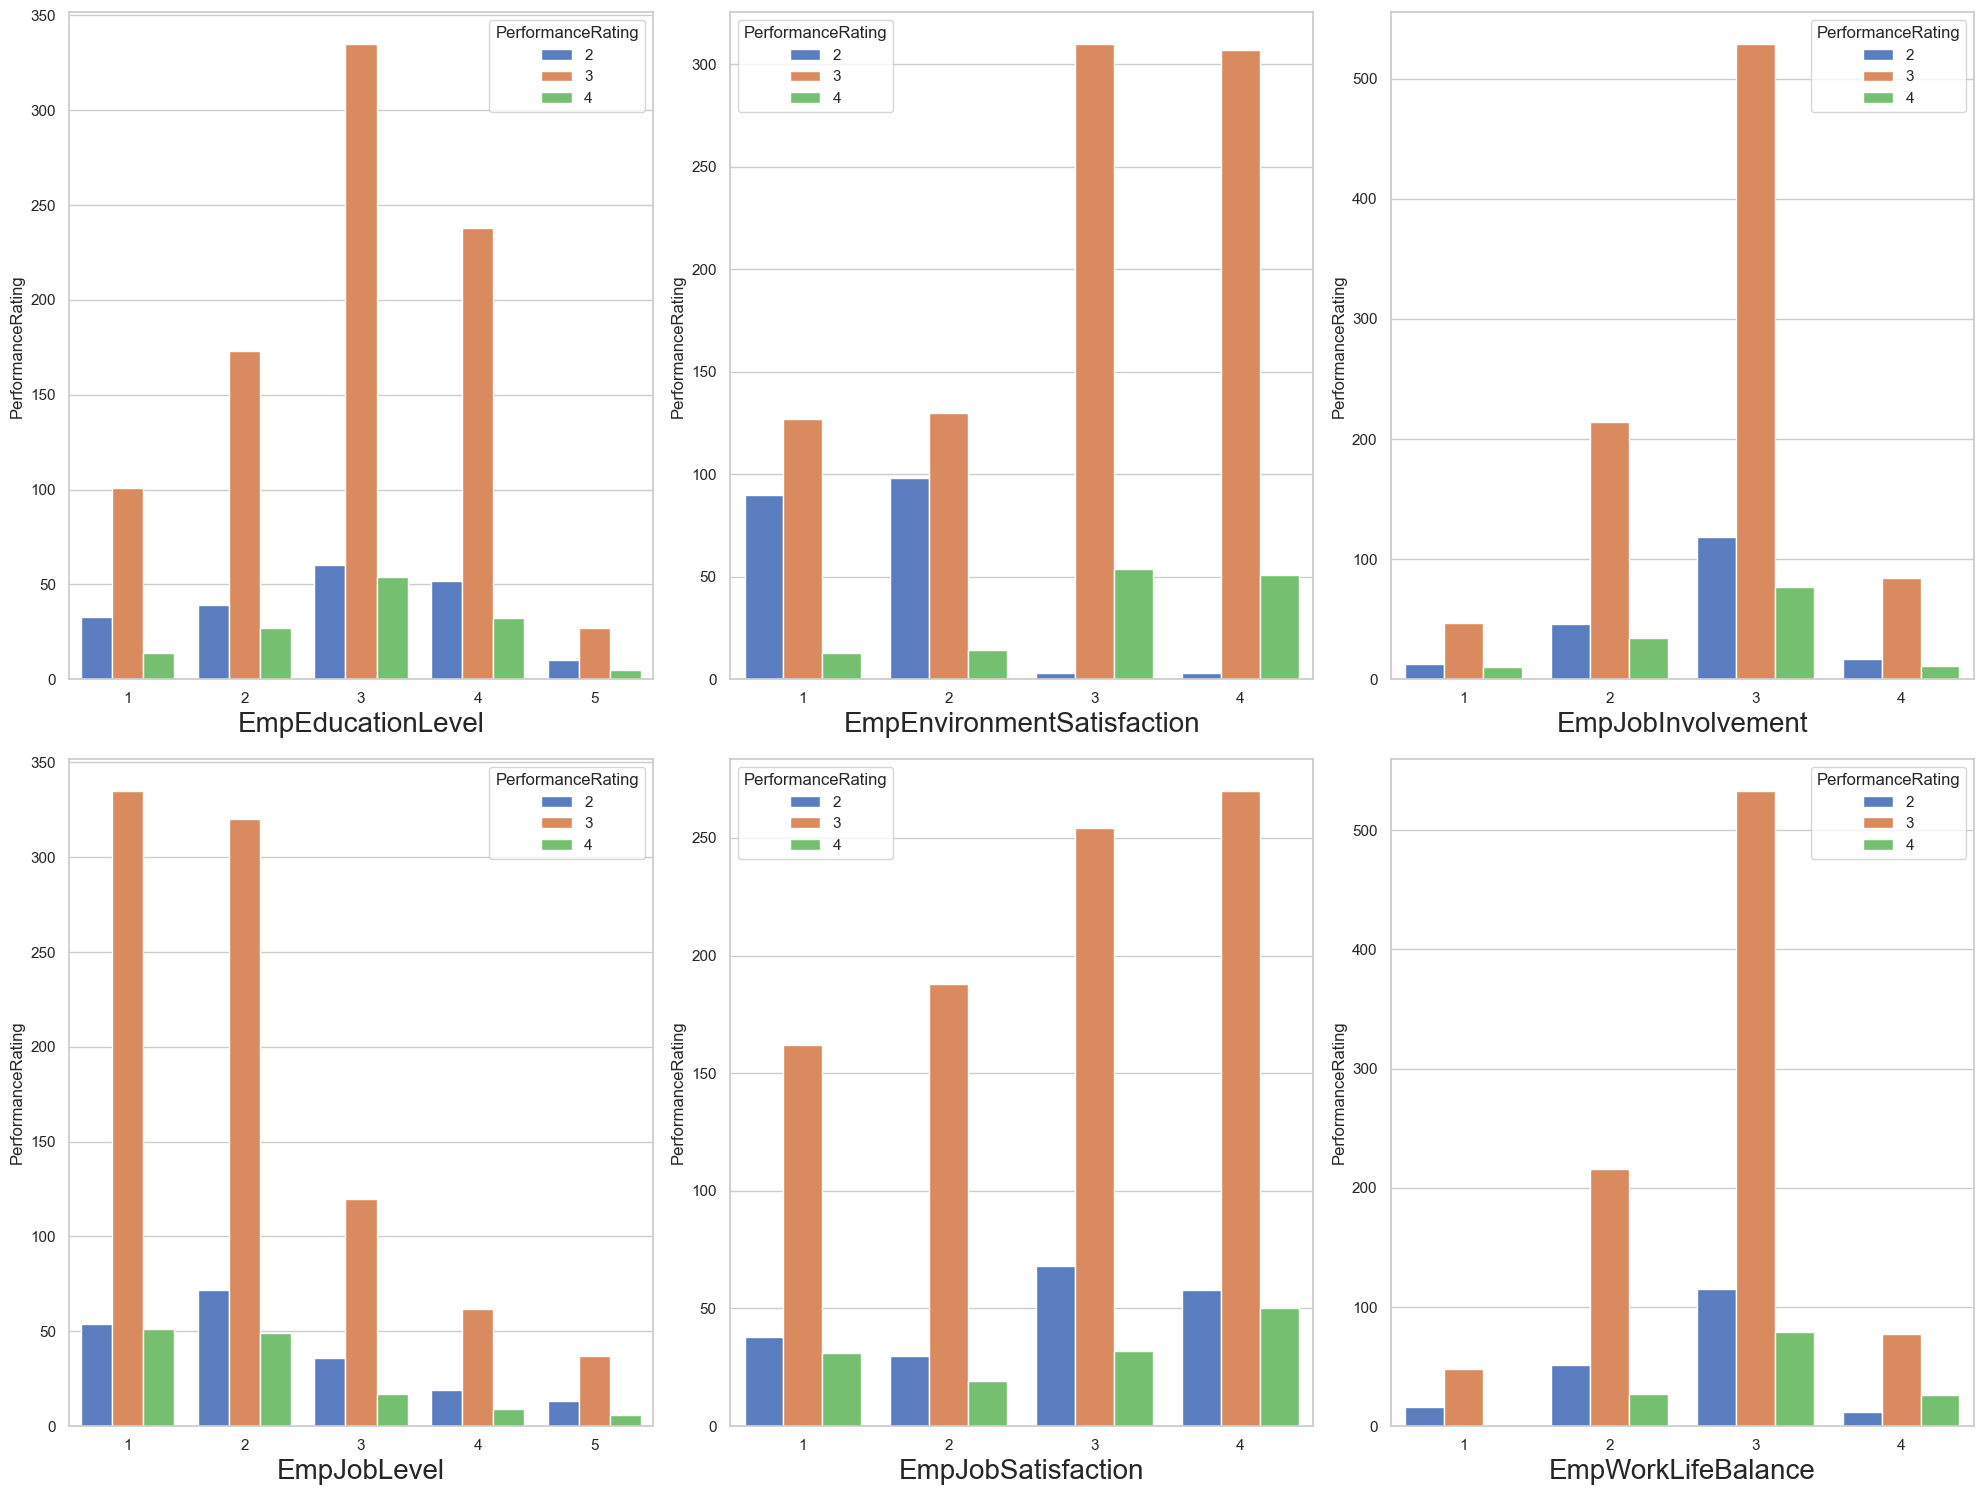

In [188]:
numerical = data[['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
                 'EmpWorkLifeBalance']]

plt.figure(figsize=(20,22)) 
plotno = 1 # counter

for column in numerical:  
    if plotno<=7:    
        plt.subplot(3,3,plotno) 
        sns.countplot(x=numerical[column],hue=data.PerformanceRating,palette='muted') 
        plt.xlabel(column,fontsize=20)  
        plt.ylabel('PerformanceRating')
    plotno+=1 
plt.tight_layout()
plt.show() # used to hide the storage loction

### Refined Observations: Attribute-wise Distribution of Performance Ratings

This refined synthesis highlights how core workplace and employee characteristics relate to performance outcomes, providing actionable signals for performance strategy.

---

#### 1. **Education Level**
- Employees with **Education Level 3** (equivalent to a bachelor’s degree) are predominantly rated **3**, indicating consistent, moderate performance.
- **Level 4** also reflects a strong cluster of rating 3, showing solid output among advanced degree holders.
- Ratings 2 and 4 are sparse across levels 1, 2, and 5, suggesting **limited representation or impact** in lower and highest education bands.

**Insight:** Formal education aligns with mid-range performance, but additional context (e.g. skills, role fit) likely mediates top-tier outcomes.

---

#### 2. **Environment Satisfaction**
- Employees with satisfaction scores of **3 and 4** make up the bulk of those rated **3**, supporting the link between a positive work environment and stable output.
- Lower satisfaction levels (1 and 2) are associated with reduced presence and weaker performance bands.

**Insight:** **Environmental quality is a reliable baseline predictor** of moderate-to-high performance. Poor morale surfaces in underperformance clusters.

---

#### 3. **Job Involvement**
- **Involvement Level 3** sees the highest number of rating 3 employees, suggesting this is an optimal engagement zone.
- Levels 1 and 2 show a tilt toward **rating 2**, indicating that low engagement hampers outcomes.
- **Level 4**, while less frequent, contributes across all performance bands.

**Insight:** Mid-level engagement appears sustainable and effective. Extremes (under- or over-engagement) may yield volatile outcomes.

---

#### 4. **Job Level**
- **Operational tiers (levels 1 and 2)** dominate employee counts and cluster tightly around rating 3.
- **Leadership roles (levels 3 to 5)** show smaller populations with **more variance across performance ratings**, including more rating 4s.

**Insight:** As complexity and responsibility increase, **performance becomes more differentiated**, signaling the need for tailored expectations and support at senior levels.

---

#### 5. **Job Satisfaction**
- High satisfaction (levels 3 and 4) aligns strongly with rating 3, confirming that **satisfied employees tend to deliver consistent performance**.
- Lower levels trend toward rating 2, with fewer instances of excellence (rating 4).

**Insight:** Job satisfaction mirrors environment sentiment and serves as an important internal barometer for workforce stability.

---

#### 6. **Work-Life Balance**
- Most rating 3 employees report **balance level 3**, showing that **moderate balance supports reliable output**.
- Levels 1 and 2 skew toward rating 2, suggesting imbalance degrades productivity.
- Level 4 is rare and inconclusive in terms of performance distribution.

**Insight:** A functional work-life balance is a **foundation for performance consistency**, while excess imbalance increases underperformance risk.

---